In [40]:
## DATA IMPUTATION FOR DATASET FROM 2011 TO 2021

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data
df = pd.read_csv('/Users/victorleung/Desktop/pharmaceutical_spending.csv')

# Filter data for the years 2011 to 2021
df_filtered_years = df[df['TIME'].between(2011, 2021, inclusive='both')].copy()

## Check for Missing Values
# Before imputing, you might want to check if there are any missing values in the dataset (other than missing years):
print(df_filtered_years.isnull().sum())

# Count the number of observations per country in the filtered timeframe
observation_counts = df_filtered_years['LOCATION'].value_counts()

# Identify countries with at least 5 observations
countries_to_keep = observation_counts[observation_counts >= 5].index

# Create a new DataFrame with only the selected countries
df_cleaned = df_filtered_years[df_filtered_years['LOCATION'].isin(countries_to_keep)].copy()

# Impute missing years with the median for each country
def impute_missing_years(group):
    years = group['TIME'].unique()
    all_years = range(2011, 2022)
    missing_years = set(all_years) - set(years)
    if missing_years:
        median_values = group.median(numeric_only=True)  # Use median for imputation
        for year in missing_years:
            new_row = {'LOCATION': group['LOCATION'].iloc[0], 'TIME': year}
            for col in median_values.index:
                if col not in ['LOCATION', 'TIME']:
                    new_row[col] = median_values[col]
            group = pd.concat([group, pd.Series(new_row).to_frame().T], ignore_index=True)
    return group.sort_values(by='TIME')

# Apply the imputation function to each group
df_imputed = df_cleaned.groupby('LOCATION', group_keys=False).apply(impute_missing_years)

# Reset index for the final cleaned and imputed DataFrame
df_imputed = df_imputed.reset_index(drop=True)

# Display the final DataFrame
print(df_imputed)

LOCATION       0
TIME           0
PC_HEALTHXP    0
PC_GDP         0
USD_CAP        0
TOTAL_SPEND    0
dtype: int64
    LOCATION  TIME PC_HEALTHXP PC_GDP   USD_CAP TOTAL_SPEND
0        AUS  2011      15.311  1.307   583.222    13029.19
1        AUS  2012      15.308  1.328   589.993    13412.59
2        AUS  2013      14.345  1.255   586.402    13562.38
3        AUS  2014      12.498  1.229   569.455    13368.35
4        AUS  2015      12.442  1.267   594.233    14152.25
..       ...   ...         ...    ...       ...         ...
446      USA  2017      11.954  2.004  1200.769   390396.57
447      USA  2018      11.766  1.957  1229.266   401771.09
448      USA  2019      11.767  1.961  1277.032   419287.86
449      USA  2020      11.037   2.07  1315.218   436030.19
450      USA  2021      11.743  2.039  1432.309   475596.74

[451 rows x 6 columns]


/var/folders/16/_jng7rbj3qg6snfqznk76h180000gn/T/ipykernel_82825/742454870.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_imputed = df_cleaned.groupby('LOCATION', group_keys=False).apply(impute_missing_years)


(A) PRE-WORK: CORRELATION HEAT MAPS

This is pre-work to Clustering Analysis. Guided by previous EDA on the total dataset from 1970 to 2021, there is a significant correlation between 3 pairs of spending variables:

        1. PC_GDP & PC_HEALTHXP  (r=0.72)
        2. USD_CAP & PC_GDP      (r=0.64)
        3. USD_CAP & TOTAL_SPEND (r=0.52)
  
~ Two Correlation Heatmaps are established to confirm the above relationship still holds for the data 2011-2021 (Imputed & Un-imputed data) before proceeding to Clustering Analysis. 

~ With the 2 Heat Maps side by side, it is interesting to see that the correlation coefficients are almost identical between Imputed & Un-imputed data, as evident from the Difference Plot: (Imputed-Unimputed) is virtually zero. It implies that Clustering Analysis on both Imputed & Unimputed data are equally valid but it is out of our project scope to verify. 

~ As a result, we will proceed with using the Imputed data for Clustering Analysis for the following from 2012 to 2021:

        1.PC_GDP & PC_HEALTHXP  (r=0.76)
        2.USD_CAP & PC_GDP      (r=0.45)
        3.USD_CAP & TOTAL_SPEND (r=0.62)


//


(B) CLUSTERING ANALYSIS:

The primary purpose of Clustering Analysis is to:

        1.Identify patterns of data that may not be immediately apparent

        2.Segment data into meaningful sub-group or clusters, allowing for more focused analysis & decision making
    
        3.Facilitate further data exploration that could lead to new insights & discoveries.


Clustering Analysis is performed for the following feature pairs:
    
        1.PC_GDP & PC_HEALTHXP  

        2.USD_CAP & PC_GDP  
        
        3.USD_CAP & TOTAL_SPEND 


Steps in Clustering Analysis:
    
        1.Filtering the data for for selected features/variables
    
        2.Filter the years for 2011 to 2021
   
        3.Group by Country & calculate the average for the selected variables over the years
    
        4.Standardize the features as Clustering is a distance-based process where big numbers will have undue influences
    
        5.Clustering using k-means & the Elbow Plot to establish the optimal k (number of clusters)
    
        6.Identify the countries in each cluster




//

(C) SCATTERPLOTS for different feature pairs will be established with countries annotated in the plots:

        1.PC_GDP & PC_HEALTHXP  

        2.USD_CAP & PC_GDP

        3.USD_CAP & TOTAL_SPEND 


  

//

(D) PAIR PLOTS (4x4) are also established with all 4 spending features for k=3:

        1.Twelve Scatterplots will be established with 4 diagonal frequency distribution curves (without USA)
    
        2.Twelve Scatterplots will be established with 4 diagonal frequency distribution curves (with USA)






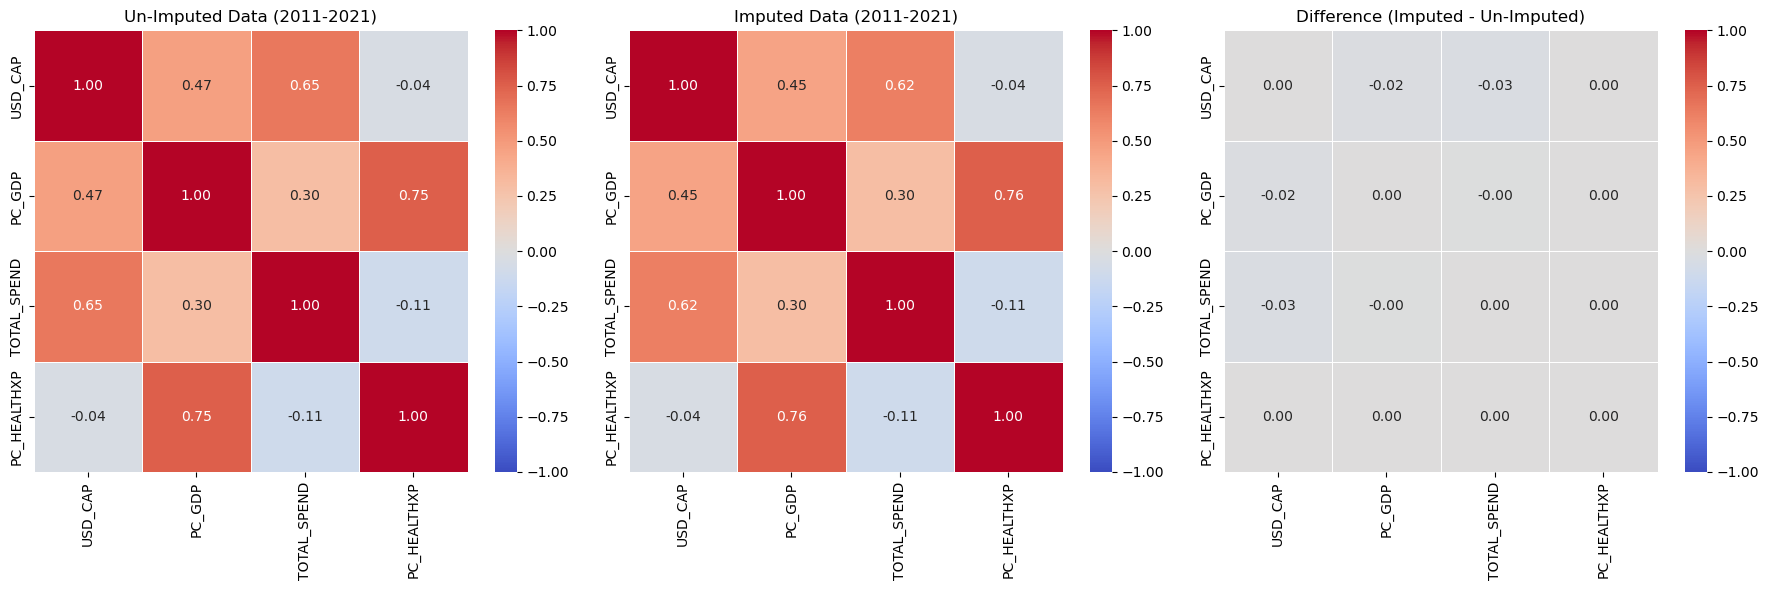

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/victorleung/Desktop/pharmaceutical_spending.csv')

# Filter data for the years 2011 to 2021 (un-imputed data)
df_filtered_years = df[df['TIME'].between(2011, 2021, inclusive='both')]

# Select 4 numeric columns of interest (e.g., USD_CAP, PC_GDP, TOTAL_SPEND, PC_HEALTHXP)
selected_columns = ['USD_CAP', 'PC_GDP', 'TOTAL_SPEND', 'PC_HEALTHXP']

# Un-imputed data
unimputed_data = df_filtered_years[selected_columns]

# Imputed data (assuming df_imputed is already created from your earlier code)
imputed_data = df_imputed[selected_columns]

# Compute correlation matrices
corr_unimputed = unimputed_data.corr()
corr_imputed = imputed_data.corr()

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Un-imputed Data Heatmap
sns.heatmap(corr_unimputed, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Un-Imputed Data (2011-2021)')

# Plot 2: Imputed Data Heatmap
sns.heatmap(corr_imputed, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Imputed Data (2011-2021)')

# Plot 3: Difference Heatmap (Imputed - Un-imputed)
corr_diff = corr_imputed - corr_unimputed
sns.heatmap(corr_diff, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, ax=axes[2])
axes[2].set_title('Difference (Imputed - Un-Imputed)')

# Adjust layout and display
plt.tight_layout()
plt.show()

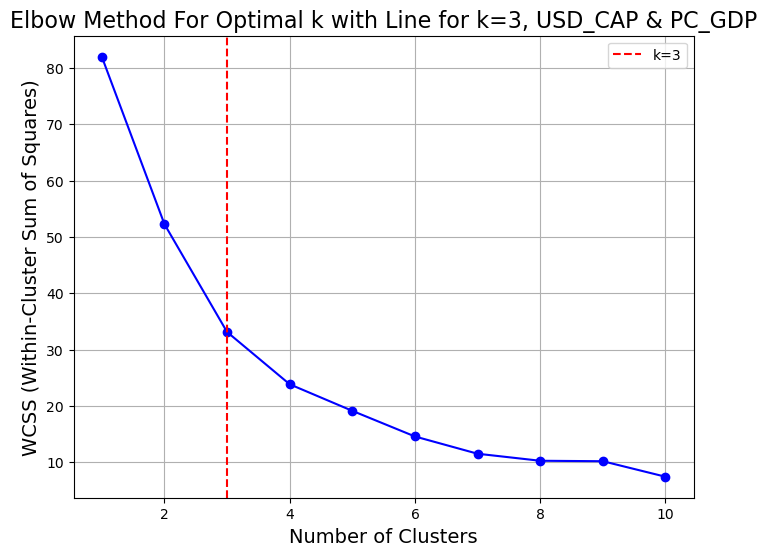

Countries in Cluster 0 for k=3: ['AUS', 'AUT', 'BEL', 'BRA', 'COL', 'CRI', 'CYP', 'CZE', 'DNK', 'ESP', 'EST', 'FIN', 'GBR', 'IRL', 'ISL', 'ISR', 'ITA', 'LUX', 'NLD', 'NOR', 'PRT', 'SVN', 'SWE']
Countries in Cluster 1 for k=3: ['BGR', 'GRC', 'HRV', 'HUN', 'KOR', 'LTU', 'LVA', 'MEX', 'POL', 'ROU', 'SVK']
Countries in Cluster 2 for k=3: ['CAN', 'CHE', 'DEU', 'FRA', 'JPN', 'MLT', 'USA']


In [42]:
## CLUSTERING FOR USD_CAP & PC_HEALTHXP

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_imputed is the imputed DataFrame from previous steps
# Filter the data for only the columns 'LOCATION', 'TIME', 'USD_CAP', 'PC_HEALTHXP'
df_cluster = df_imputed[['LOCATION', 'TIME', 'USD_CAP', 'PC_HEALTHXP']].dropna()

# Filter data for the years 2011 to 2021
df_cluster = df_cluster[df_cluster['TIME'].between(2011, 2021)]

# Group by country and calculate the average for 'USD_CAP' and 'PC_HEALTHXP' over the years
df_cluster_avg = df_cluster.groupby('LOCATION')[['USD_CAP', 'PC_HEALTHXP']].mean().reset_index()

# Standardize the features (important for clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster_avg[['USD_CAP', 'PC_HEALTHXP']])

# Elbow method to find optimal k
wcss = []  # List to hold WCSS values for different cluster counts
for i in range(1, 11):  # Trying with 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot WCSS for different values of k with a solid line and a line for k=3
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')  # Solid line for WCSS
plt.axvline(x=3, color='r', linestyle='--', label='k=3')  # Red dashed line at k=3

# Add labels and title
plt.title('Elbow Method For Optimal k with Line for k=3, USD_CAP & PC_GDP', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Apply KMeans for k=3 to identify clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df_cluster_avg['Cluster_k3'] = kmeans_3.fit_predict(df_scaled)

# List the countries for each cluster in k=3
for cluster_num in range(3):
    countries_k3 = df_cluster_avg[df_cluster_avg['Cluster_k3'] == cluster_num]['LOCATION'].tolist()
    print(f"Countries in Cluster {cluster_num} for k=3: {countries_k3}")


With Clustering Analysis for USD_CAP & PC_GDP,the optimal k=3 i.e. 3 clusters.

The countries are listed as follows:
    Cluster 0: ['AUS', 'AUT', 'BEL', 'BRA', 'COL', 'CRI', 'CYP', 'CZE', 'DNK', 'ESP', 'EST', 'FIN', 'GBR', 'IRL', 'ISL', 'ISR', 'ITA', 'LUX', 'NLD', 'NOR', 'PRT', 'SVN', 'SWE']
    Cluster 1: ['BGR', 'GRC', 'HRV', 'HUN', 'KOR', 'LTU', 'LVA', 'MEX', 'POL', 'ROU', 'SVK']
    Cluster 2: ['CAN', 'CHE', 'DEU', 'FRA', 'JPN', 'MLT', 'USA']

It is evident that Cluster 0 & 1 consist of both developed & developing countrie, whereas Cluster 2 is mostly developed countries.

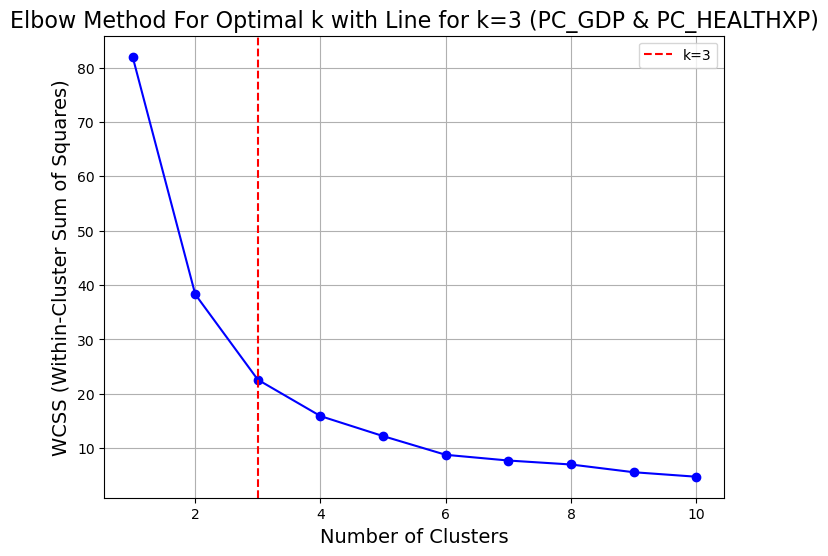


Countries in clusters for k=3 (PC_GDP & PC_HEALTHXP):
Cluster 0 for k=3: ['AUS', 'AUT', 'BEL', 'CHE', 'COL', 'CRI', 'CYP', 'DNK', 'EST', 'FIN', 'GBR', 'IRL', 'ISL', 'ISR', 'LUX', 'NLD', 'NOR', 'SWE']
Cluster 1 for k=3: ['BRA', 'CAN', 'CZE', 'DEU', 'ESP', 'FRA', 'HRV', 'ITA', 'JPN', 'KOR', 'LTU', 'LVA', 'MEX', 'MLT', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'USA']
Cluster 2 for k=3: ['BGR', 'GRC', 'HUN']


In [43]:
## CLUSTERING FOR PC_GDP & PC_HEALTHXP

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_imputed is the imputed DataFrame from previous steps
# Filter the data for only the columns 'LOCATION', 'TIME', 'PC_GDP', 'PC_HEALTHXP'
df_cluster = df_imputed[['LOCATION', 'TIME', 'PC_GDP', 'PC_HEALTHXP']].dropna()

# Filter data for the years 2011 to 2021
df_cluster = df_cluster[df_cluster['TIME'].between(2011, 2021)]

# Group by country and calculate the average for 'PC_GDP' and 'PC_HEALTHXP' over the years
df_cluster_avg = df_cluster.groupby('LOCATION')[['PC_GDP', 'PC_HEALTHXP']].mean().reset_index()

# Standardize the features (important for clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster_avg[['PC_GDP', 'PC_HEALTHXP']])

# Elbow method to find optimal k
wcss = []  # List to hold WCSS values for different cluster counts
for i in range(1, 11):  # Trying with 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot WCSS for different values of k with a solid line for k=3
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')  # Solid line for WCSS
plt.axvline(x=3, color='r', linestyle='--', label='k=3')  # Red dashed line at k=3

# Add labels and title
plt.title('Elbow Method For Optimal k with Line for k=3 (PC_GDP & PC_HEALTHXP)', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Apply KMeans for k=3 to identify clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df_cluster_avg['Cluster_k3'] = kmeans_3.fit_predict(df_scaled)

# List the countries for each cluster in k=3
print("\nCountries in clusters for k=3 (PC_GDP & PC_HEALTHXP):")
for cluster_num in range(3):
    countries_k3 = df_cluster_avg[df_cluster_avg['Cluster_k3'] == cluster_num]['LOCATION'].tolist()
    print(f"Cluster {cluster_num} for k=3: {countries_k3}")


For Clustering Analysis for PC_GDP & PC_HEALTHXP, the optimal k=3. 

Countries in clusters for k=3 (PC_GDP & PC_HEALTHXP):
        Cluster 0: ['AUS', 'AUT', 'BEL', 'CHE', 'COL', 'CRI', 'CYP', 'DNK', 'EST', 'FIN', 'GBR', 'IRL', 'ISL', 'ISR', 'LUX', 'NLD', 'NOR', 'SWE']
        Cluster 1: ['BRA', 'CAN', 'CZE', 'DEU', 'ESP', 'FRA', 'HRV', 'ITA', 'JPN', 'KOR', 'LTU', 'LVA', 'MEX', 'MLT', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'USA']
        Cluster 2: ['BGR', 'GRC', 'HUN']



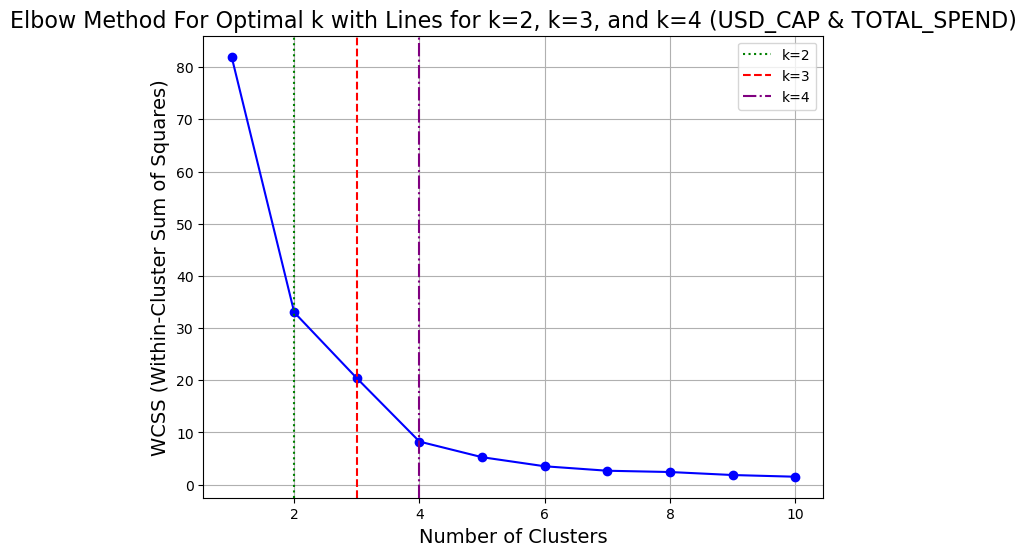


Countries in clusters for k=2 (USD_CAP & TOTAL_SPEND):
Cluster 0 for k=2: ['AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHE', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'MLT', 'NLD', 'NOR', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE']
Cluster 1 for k=2: ['USA']

Countries in clusters for k=3 (USD_CAP & TOTAL_SPEND):
Cluster 0 for k=3: ['AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CHE', 'COL', 'CRI', 'CYP', 'CZE', 'DNK', 'ESP', 'EST', 'FIN', 'GBR', 'GRC', 'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'MLT', 'NLD', 'NOR', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE']
Cluster 1 for k=3: ['USA']
Cluster 2 for k=3: ['CAN', 'DEU', 'FRA', 'JPN']

Countries in clusters for k=4 (USD_CAP & TOTAL_SPEND):
Cluster 0 for k=4: ['AUS', 'AUT', 'BEL', 'BGR', 'CHE', 'CZE', 'ESP', 'FIN', 'GBR', 'GRC', 'HUN', 'IRL', 'ISL', 'ITA', 'KOR', 'LTU', 'LUX', 'MLT', 'NOR', 'PRT'

In [44]:
## CLUSTERING FOR USD_CAP & TOTAL_SPEND

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_imputed is the imputed DataFrame from previous steps
# Filter the data for only the columns 'LOCATION', 'TIME', 'USD_CAP', 'TOTAL_SPEND'
df_cluster = df_imputed[['LOCATION', 'TIME', 'USD_CAP', 'TOTAL_SPEND']].dropna()

# Filter data for the years 2011 to 2021
df_cluster = df_cluster[df_cluster['TIME'].between(2011, 2021)]

# Group by country and calculate the average for 'USD_CAP' and 'TOTAL_SPEND' over the years
df_cluster_avg = df_cluster.groupby('LOCATION')[['USD_CAP', 'TOTAL_SPEND']].mean().reset_index()

# Standardize the features (important for clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster_avg[['USD_CAP', 'TOTAL_SPEND']])

# Elbow method to find optimal k
wcss = []  # List to hold WCSS values for different cluster counts
for i in range(1, 11):  # Trying with 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot WCSS for different values of k with solid and dotted lines for k=2, k=3, and k=4
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')  # Solid line for WCSS
plt.axvline(x=2, color='g', linestyle=':', label='k=2')  # Green dotted line at k=2
plt.axvline(x=3, color='r', linestyle='--', label='k=3')  # Red dashed line at k=3
plt.axvline(x=4, color='purple', linestyle='-.', label='k=4')  # Purple dash-dot line at k=4

# Add labels and title
plt.title('Elbow Method For Optimal k with Lines for k=2, k=3, and k=4 (USD_CAP & TOTAL_SPEND)', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Apply KMeans for k=2 to identify clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
df_cluster_avg['Cluster_k2'] = kmeans_2.fit_predict(df_scaled)

# Apply KMeans for k=3 to identify clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df_cluster_avg['Cluster_k3'] = kmeans_3.fit_predict(df_scaled)

# Apply KMeans for k=4 to identify clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df_cluster_avg['Cluster_k4'] = kmeans_4.fit_predict(df_scaled)

# List the countries for each cluster in k=2
print("\nCountries in clusters for k=2 (USD_CAP & TOTAL_SPEND):")
for cluster_num in range(2):
    countries_k2 = df_cluster_avg[df_cluster_avg['Cluster_k2'] == cluster_num]['LOCATION'].tolist()
    print(f"Cluster {cluster_num} for k=2: {countries_k2}")

# List the countries for each cluster in k=3
print("\nCountries in clusters for k=3 (USD_CAP & TOTAL_SPEND):")
for cluster_num in range(3):
    countries_k3 = df_cluster_avg[df_cluster_avg['Cluster_k3'] == cluster_num]['LOCATION'].tolist()
    print(f"Cluster {cluster_num} for k=3: {countries_k3}")

# List the countries for each cluster in k=4
print("\nCountries in clusters for k=4 (USD_CAP & TOTAL_SPEND):")
for cluster_num in range(4):
    countries_k4 = df_cluster_avg[df_cluster_avg['Cluster_k4'] == cluster_num]['LOCATION'].tolist()
    print(f"Cluster {cluster_num} for k=4: {countries_k4}")


It looks like USA is an outlier causing some difficulties in determining the optimal k. 

In each of the k, USA is on its own as a cluster.

As a result, USA will be removed and analysis repeated.


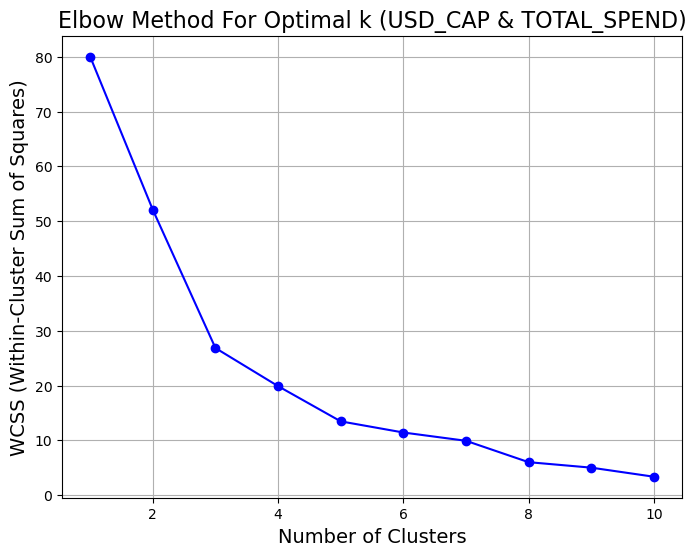

In [45]:
## USA EXCLUDED

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_imputed is the imputed DataFrame from previous steps
# Filter the data for only the columns 'LOCATION', 'TIME', 'USD_CAP', 'TOTAL_SPEND'
df_cluster = df_imputed[['LOCATION', 'TIME', 'USD_CAP', 'TOTAL_SPEND']].dropna()

# Remove the USA from the LOCATION column
df_cluster = df_cluster[df_cluster['LOCATION'] != 'USA']

# Filter data for the years 2011 to 2021
df_cluster = df_cluster[df_cluster['TIME'].between(2011, 2021)]

# Group by country and calculate the average for 'USD_CAP' and 'TOTAL_SPEND' over the years
df_cluster_avg = df_cluster.groupby('LOCATION')[['USD_CAP', 'TOTAL_SPEND']].mean().reset_index()

# Standardize the features (important for clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster_avg[['USD_CAP', 'TOTAL_SPEND']])

# Elbow method to find optimal k
wcss = []  # List to hold WCSS values for different cluster counts
for i in range(1, 11):  # Trying with 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot WCSS for different values of k without dotted lines for k=2, k=3, and k=4
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')  # Solid line for WCSS

# Add labels and title
plt.title('Elbow Method For Optimal k (USD_CAP & TOTAL_SPEND)', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()


After removal of USA, Clustering Analysis is repeated and the optimal k = 3.

Countries in clusters for k=3 (USD_CAP & TOTAL_SPEND):

                Cluster 0: ['BRA', 'COL', 'CRI', 'CYP', 'DNK', 'EST', 'HRV', 'ISR', 'LVA', 'MEX', 'NLD', 'NOR', 'POL', 'PRT', 'ROU']
                Cluster 1: ['CAN', 'DEU', 'FRA', 'JPN']
                Cluster 2: ['AUS', 'AUT', 'BEL', 'BGR', 'CHE', 'CZE', 'ESP', 'FIN', 'GBR', 'GRC', 'HUN', 'IRL', 'ISL', 'ITA', 'KOR', 'LTU', 'LUX', 'MLT', 'SVK', 'SVN', 'SWE']

In [46]:
## USA EXCLUDED

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df_imputed is the imputed DataFrame from previous steps
# Filter the data for only the columns 'LOCATION', 'TIME', 'USD_CAP', 'TOTAL_SPEND'
df_cluster = df_imputed[['LOCATION', 'TIME', 'USD_CAP', 'TOTAL_SPEND']].dropna()

# Remove the USA from the LOCATION column
df_cluster = df_cluster[df_cluster['LOCATION'] != 'USA']

# Filter data for the years 2011 to 2021
df_cluster = df_cluster[df_cluster['TIME'].between(2011, 2021)]

# Group by country and calculate the average for 'USD_CAP' and 'TOTAL_SPEND' over the years
df_cluster_avg = df_cluster.groupby('LOCATION')[['USD_CAP', 'TOTAL_SPEND']].mean().reset_index()

# Standardize the features (important for clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster_avg[['USD_CAP', 'TOTAL_SPEND']])

# Apply KMeans for k=3 to identify clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df_cluster_avg['Cluster_k3'] = kmeans_3.fit_predict(df_scaled)

# List the countries for each cluster in k=3
print("\nCountries in clusters for k=3 (USD_CAP & TOTAL_SPEND):")
for cluster_num in range(3):
    countries_k3 = df_cluster_avg[df_cluster_avg['Cluster_k3'] == cluster_num]['LOCATION'].tolist()
    print(f"Cluster {cluster_num} for k=3: {countries_k3}")



Countries in clusters for k=3 (USD_CAP & TOTAL_SPEND):
Cluster 0 for k=3: ['BRA', 'COL', 'CRI', 'CYP', 'DNK', 'EST', 'HRV', 'ISR', 'LVA', 'MEX', 'NLD', 'NOR', 'POL', 'PRT', 'ROU']
Cluster 1 for k=3: ['CAN', 'DEU', 'FRA', 'JPN']
Cluster 2 for k=3: ['AUS', 'AUT', 'BEL', 'BGR', 'CHE', 'CZE', 'ESP', 'FIN', 'GBR', 'GRC', 'HUN', 'IRL', 'ISL', 'ITA', 'KOR', 'LTU', 'LUX', 'MLT', 'SVK', 'SVN', 'SWE']


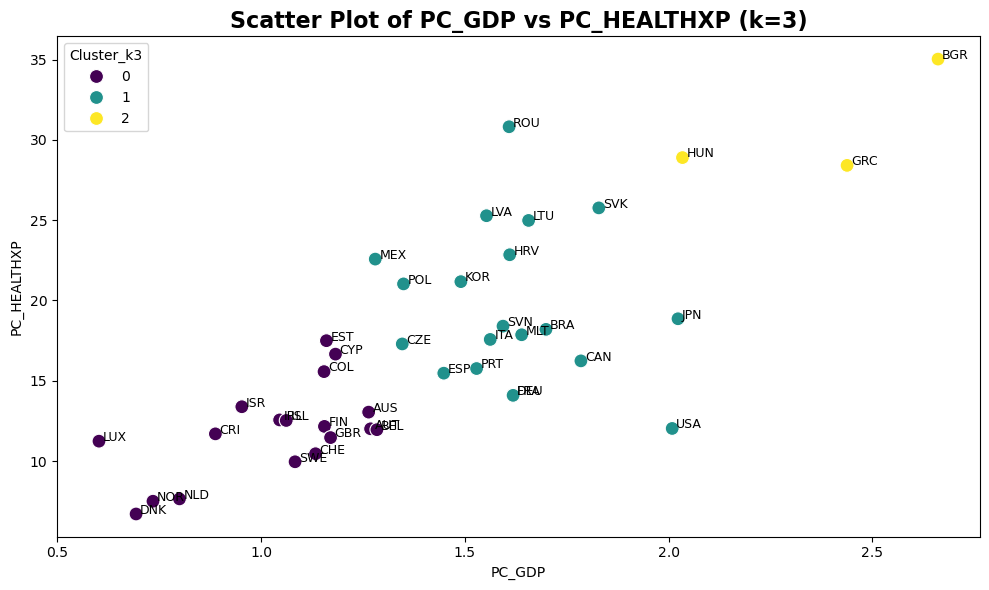

In [47]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_imputed is the imputed DataFrame from previous steps
# Filter the data for the columns 'LOCATION', 'TIME', 'PC_GDP', 'PC_HEALTHXP'
df_cluster = df_imputed[['LOCATION', 'TIME', 'PC_GDP', 'PC_HEALTHXP']].dropna()

# Filter data for the years 2011 to 2021 (including both)
df_cluster = df_cluster[df_cluster['TIME'].between(2011, 2021)]

# Group by country and calculate the average for the relevant columns over the years
df_cluster_avg = df_cluster.groupby('LOCATION')[['PC_GDP', 'PC_HEALTHXP']].mean().reset_index()

# Standardize the features (important for clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster_avg[['PC_GDP', 'PC_HEALTHXP']])

# Apply KMeans for k=3 to identify clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df_cluster_avg['Cluster_k3'] = kmeans_3.fit_predict(df_scaled)

# Create a scatter plot for PC_GDP vs PC_HEALTHXP, color by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster_avg, x='PC_GDP', y='PC_HEALTHXP', hue='Cluster_k3', palette='viridis', s=100)

# Annotate each data point with the country name
for i in range(df_cluster_avg.shape[0]):
    plt.text(df_cluster_avg['PC_GDP'].iloc[i] + 0.01, df_cluster_avg['PC_HEALTHXP'].iloc[i] + 0.01,
             df_cluster_avg['LOCATION'].iloc[i], fontsize=9)

# Add title and labels
plt.title('Scatter Plot of PC_GDP vs PC_HEALTHXP (k=3)', fontsize=16, fontweight='bold')
plt.xlabel('PC_GDP')
plt.ylabel('PC_HEALTHXP')

# Show the plot
plt.tight_layout()
plt.show()


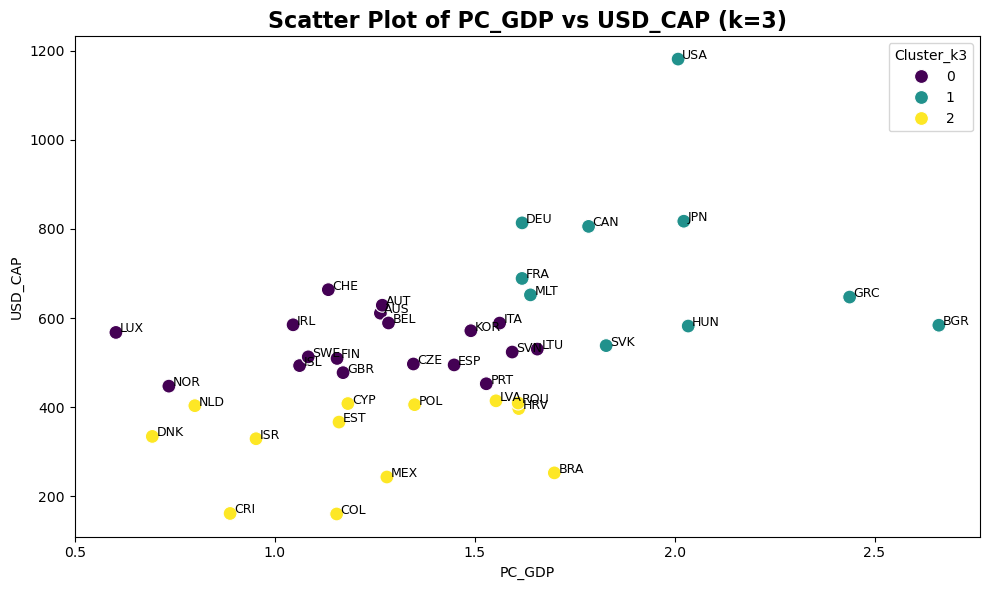

In [48]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_imputed is the imputed DataFrame from previous steps
# Filter the data for the columns 'LOCATION', 'TIME', 'PC_GDP', 'USD_CAP'
df_cluster = df_imputed[['LOCATION', 'TIME', 'PC_GDP', 'USD_CAP']].dropna()

# Filter data for the years 2011 to 2021 (including both)
df_cluster = df_cluster[df_cluster['TIME'].between(2011, 2021)]

# Group by country and calculate the average for the relevant columns over the years
df_cluster_avg = df_cluster.groupby('LOCATION')[['PC_GDP', 'USD_CAP']].mean().reset_index()

# Standardize the features (important for clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster_avg[['PC_GDP', 'USD_CAP']])

# Apply KMeans for k=3 to identify clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df_cluster_avg['Cluster_k3'] = kmeans_3.fit_predict(df_scaled)

# Create a scatter plot for PC_GDP vs USD_CAP, color by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster_avg, x='PC_GDP', y='USD_CAP', hue='Cluster_k3', palette='viridis', s=100)

# Annotate each data point with the country name
for i in range(df_cluster_avg.shape[0]):
    plt.text(df_cluster_avg['PC_GDP'].iloc[i] + 0.01, df_cluster_avg['USD_CAP'].iloc[i] + 0.01,
             df_cluster_avg['LOCATION'].iloc[i], fontsize=9)

# Add title and labels
plt.title('Scatter Plot of PC_GDP vs USD_CAP (k=3)', fontsize=16, fontweight='bold')
plt.xlabel('PC_GDP')
plt.ylabel('USD_CAP')

# Show the plot
plt.tight_layout()
plt.show()


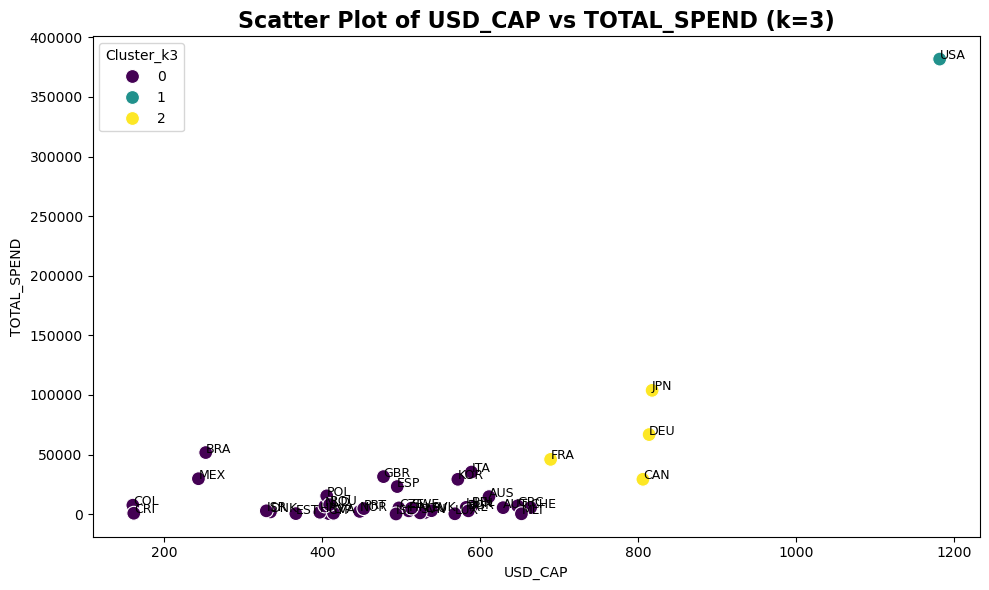

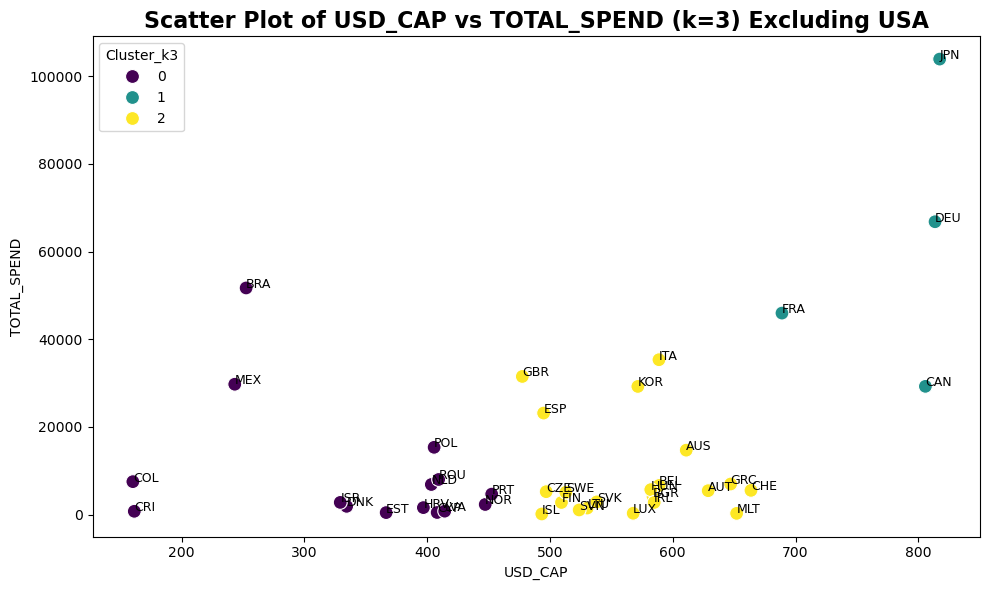

In [49]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_imputed is the imputed DataFrame from previous steps

# Function to create scatter plot for USD_CAP vs TOTAL_SPEND
def create_scatter_plot_with_clusters(df, exclude_usa=False):
    # Filter the data for the columns 'LOCATION', 'TIME', 'USD_CAP', 'TOTAL_SPEND'
    df_cluster = df[['LOCATION', 'TIME', 'USD_CAP', 'TOTAL_SPEND']].dropna()

    # Optionally exclude USA
    if exclude_usa:
        df_cluster = df_cluster[df_cluster['LOCATION'] != 'USA']

    # Filter data for the years 2011 to 2021 (including both)
    df_cluster = df_cluster[df_cluster['TIME'].between(2011, 2021)]

    # Group by country and calculate the average for the relevant columns over the years
    df_cluster_avg = df_cluster.groupby('LOCATION')[['USD_CAP', 'TOTAL_SPEND']].mean().reset_index()

    # Standardize the features (important for clustering)
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_cluster_avg[['USD_CAP', 'TOTAL_SPEND']])

    # Apply KMeans for k=3 to identify clusters
    kmeans_3 = KMeans(n_clusters=3, random_state=42)
    df_cluster_avg['Cluster_k3'] = kmeans_3.fit_predict(df_scaled)

    # Create a scatter plot for USD_CAP vs TOTAL_SPEND, color by cluster
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_cluster_avg, x='USD_CAP', y='TOTAL_SPEND', hue='Cluster_k3', palette='viridis', s=100)

    # Annotate each data point with the country name
    for i in range(df_cluster_avg.shape[0]):
        plt.text(df_cluster_avg['USD_CAP'].iloc[i] + 0.01, df_cluster_avg['TOTAL_SPEND'].iloc[i] + 0.01,
                 df_cluster_avg['LOCATION'].iloc[i], fontsize=9)

    # Add title and labels
    title = 'Scatter Plot of USD_CAP vs TOTAL_SPEND (k=3)' + (' Excluding USA' if exclude_usa else '')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('USD_CAP')
    plt.ylabel('TOTAL_SPEND')

    # Show the plot
    plt.tight_layout()
    plt.show()

# 1. Scatter Plot for USD_CAP vs TOTAL_SPEND without excluding USA
create_scatter_plot_with_clusters(df_imputed, exclude_usa=False)

# 2. Scatter Plot for USD_CAP vs TOTAL_SPEND with exclusion of USA
create_scatter_plot_with_clusters(df_imputed, exclude_usa=True)


In [50]:
## EXLUDING USA

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_imputed is the imputed DataFrame from previous steps

# Function to perform clustering and list countries by cluster
def perform_clustering_and_list_countries(df, variables, exclude_usa=False):
    # Filter the data for the specified variables
    df_cluster = df[['LOCATION', 'TIME'] + variables].dropna()

    # Exclude USA if specified
    if exclude_usa:
        df_cluster = df_cluster[df_cluster['LOCATION'] != 'USA']

    # Filter data for the years 2011 to 2021 (inclusive)
    df_cluster = df_cluster[df_cluster['TIME'].between(2011, 2021)]

    # Group by country and calculate the average for the relevant columns over the years
    df_cluster_avg = df_cluster.groupby('LOCATION')[variables].mean().reset_index()

    # Standardize the features (important for clustering)
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_cluster_avg[variables])

    # Apply KMeans clustering (k=3)
    kmeans = KMeans(n_clusters=3, random_state=42)
    df_cluster_avg['Cluster_k3'] = kmeans.fit_predict(df_scaled)

    # List the countries by cluster
    countries_by_cluster = {}
    for cluster_num in range(3):
        countries_in_cluster = df_cluster_avg[df_cluster_avg['Cluster_k3'] == cluster_num]['LOCATION'].tolist()
        countries_by_cluster[cluster_num] = countries_in_cluster

    # Print the countries in each cluster
    for cluster_num, countries in countries_by_cluster.items():
        print(f"Cluster {cluster_num + 1} contains: {', '.join(countries)}")

# 1. USD_CAP & PC_GDP
print("Clusters for USD_CAP & PC_GDP (Excluding USA):")
perform_clustering_and_list_countries(df_imputed, ['USD_CAP', 'PC_GDP'], exclude_usa=True)

# 2. USD_CAP & TOTAL_SPEND
print("\nClusters for USD_CAP & TOTAL_SPEND (Excluding USA):")
perform_clustering_and_list_countries(df_imputed, ['USD_CAP', 'TOTAL_SPEND'], exclude_usa=True)

# 3. PC_GDP & PC_HEALTHXP
print("\nClusters for PC_GDP & PC_HEALTHXP (Excluding USA):")
perform_clustering_and_list_countries(df_imputed, ['PC_GDP', 'PC_HEALTHXP'], exclude_usa=True)


Clusters for USD_CAP & PC_GDP (Excluding USA):
Cluster 1 contains: BRA, COL, CRI, CYP, DNK, EST, HRV, ISR, LVA, MEX, NLD, POL, ROU
Cluster 2 contains: BGR, CAN, DEU, FRA, GRC, HUN, JPN, MLT, SVK
Cluster 3 contains: AUS, AUT, BEL, CHE, CZE, ESP, FIN, GBR, IRL, ISL, ITA, KOR, LTU, LUX, NOR, PRT, SVN, SWE

Clusters for USD_CAP & TOTAL_SPEND (Excluding USA):
Cluster 1 contains: BRA, COL, CRI, CYP, DNK, EST, HRV, ISR, LVA, MEX, NLD, NOR, POL, PRT, ROU
Cluster 2 contains: CAN, DEU, FRA, JPN
Cluster 3 contains: AUS, AUT, BEL, BGR, CHE, CZE, ESP, FIN, GBR, GRC, HUN, IRL, ISL, ITA, KOR, LTU, LUX, MLT, SVK, SVN, SWE

Clusters for PC_GDP & PC_HEALTHXP (Excluding USA):
Cluster 1 contains: AUS, AUT, BEL, CHE, COL, CRI, CYP, DNK, EST, FIN, GBR, IRL, ISL, ISR, LUX, NLD, NOR, SWE
Cluster 2 contains: BRA, CAN, CZE, DEU, ESP, FRA, HRV, ITA, JPN, KOR, LTU, LVA, MEX, MLT, POL, PRT, ROU, SVK, SVN
Cluster 3 contains: BGR, GRC, HUN


In [51]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_imputed is the imputed DataFrame from previous steps

# Function to perform clustering and list countries by cluster
def perform_clustering_and_list_countries(df, variables, exclude_usa=False):
    # Filter the data for the specified variables
    df_cluster = df[['LOCATION', 'TIME'] + variables].dropna()

    # Filter data for the years 2011 to 2021 (inclusive)
    df_cluster = df_cluster[df_cluster['TIME'].between(2011, 2021)]

    # Group by country and calculate the average for the relevant columns over the years
    df_cluster_avg = df_cluster.groupby('LOCATION')[variables].mean().reset_index()

    # Standardize the features (important for clustering)
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_cluster_avg[variables])

    # Apply KMeans clustering (k=3)
    kmeans = KMeans(n_clusters=3, random_state=42)
    df_cluster_avg['Cluster_k3'] = kmeans.fit_predict(df_scaled)

    # List the countries by cluster
    countries_by_cluster = {}
    for cluster_num in range(3):
        countries_in_cluster = df_cluster_avg[df_cluster_avg['Cluster_k3'] == cluster_num]['LOCATION'].tolist()
        countries_by_cluster[cluster_num] = countries_in_cluster

    # Print the countries in each cluster
    for cluster_num, countries in countries_by_cluster.items():
        print(f"Cluster {cluster_num + 1} contains: {', '.join(countries)}")

# 1. USD_CAP & PC_GDP
print("Clusters for USD_CAP & PC_GDP (Including USA):")
perform_clustering_and_list_countries(df_imputed, ['USD_CAP', 'PC_GDP'], exclude_usa=False)

# 2. USD_CAP & TOTAL_SPEND
print("\nClusters for USD_CAP & TOTAL_SPEND (Including USA):")
perform_clustering_and_list_countries(df_imputed, ['USD_CAP', 'TOTAL_SPEND'], exclude_usa=False)

# 3. PC_GDP & PC_HEALTHXP
print("\nClusters for PC_GDP & PC_HEALTHXP (Including USA):")
perform_clustering_and_list_countries(df_imputed, ['PC_GDP', 'PC_HEALTHXP'], exclude_usa=False)


Clusters for USD_CAP & PC_GDP (Including USA):
Cluster 1 contains: AUS, AUT, BEL, CHE, CZE, ESP, FIN, GBR, IRL, ISL, ITA, KOR, LTU, LUX, NOR, PRT, SVN, SWE
Cluster 2 contains: BGR, CAN, DEU, FRA, GRC, HUN, JPN, MLT, SVK, USA
Cluster 3 contains: BRA, COL, CRI, CYP, DNK, EST, HRV, ISR, LVA, MEX, NLD, POL, ROU

Clusters for USD_CAP & TOTAL_SPEND (Including USA):
Cluster 1 contains: AUS, AUT, BEL, BGR, BRA, CHE, COL, CRI, CYP, CZE, DNK, ESP, EST, FIN, GBR, GRC, HRV, HUN, IRL, ISL, ISR, ITA, KOR, LTU, LUX, LVA, MEX, MLT, NLD, NOR, POL, PRT, ROU, SVK, SVN, SWE
Cluster 2 contains: USA
Cluster 3 contains: CAN, DEU, FRA, JPN

Clusters for PC_GDP & PC_HEALTHXP (Including USA):
Cluster 1 contains: AUS, AUT, BEL, CHE, COL, CRI, CYP, DNK, EST, FIN, GBR, IRL, ISL, ISR, LUX, NLD, NOR, SWE
Cluster 2 contains: BRA, CAN, CZE, DEU, ESP, FRA, HRV, ITA, JPN, KOR, LTU, LVA, MEX, MLT, POL, PRT, ROU, SVK, SVN, USA
Cluster 3 contains: BGR, GRC, HUN


In [52]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df_imputed is the imputed DataFrame from previous steps

# Function to perform clustering and list countries by cluster
def perform_clustering_and_list_countries(df, variables, exclude_usa=False):
    # Filter the data for the specified variables
    df_cluster = df[['LOCATION', 'TIME'] + variables].dropna()

    # Exclude USA if specified
    if exclude_usa:
        df_cluster = df_cluster[df_cluster['LOCATION'] != 'USA']

    # Filter data for the years 2011 to 2021 (inclusive)
    df_cluster = df_cluster[df_cluster['TIME'].between(2011, 2021)]

    # Group by country and calculate the average for the relevant columns over the years
    df_cluster_avg = df_cluster.groupby('LOCATION')[variables].mean().reset_index()

    # Standardize the features (important for clustering)
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_cluster_avg[variables])

    # Apply KMeans clustering (k=3)
    kmeans = KMeans(n_clusters=3, random_state=42)
    df_cluster_avg['Cluster_k3'] = kmeans.fit_predict(df_scaled)

    # List the countries by cluster
    countries_by_cluster = {}
    for cluster_num in range(3):
        countries_in_cluster = df_cluster_avg[df_cluster_avg['Cluster_k3'] == cluster_num]['LOCATION'].tolist()
        countries_by_cluster[cluster_num] = countries_in_cluster

    # Print the countries in each cluster
    for cluster_num, countries in countries_by_cluster.items():
        print(f"Cluster {cluster_num + 1} contains: {', '.join(countries)}")

# 1. USD_CAP & PC_GDP
print("Clusters for USD_CAP & PC_GDP (Excluding USA):")
perform_clustering_and_list_countries(df_imputed, ['USD_CAP', 'PC_GDP'], exclude_usa=True)

# 2. USD_CAP & TOTAL_SPEND
print("\nClusters for USD_CAP & TOTAL_SPEND (Excluding USA):")
perform_clustering_and_list_countries(df_imputed, ['USD_CAP', 'TOTAL_SPEND'], exclude_usa=True)

# 3. PC_GDP & PC_HEALTHXP
print("\nClusters for PC_GDP & PC_HEALTHXP (Excluding USA):")
perform_clustering_and_list_countries(df_imputed, ['PC_GDP', 'PC_HEALTHXP'], exclude_usa=True)


Clusters for USD_CAP & PC_GDP (Excluding USA):
Cluster 1 contains: BRA, COL, CRI, CYP, DNK, EST, HRV, ISR, LVA, MEX, NLD, POL, ROU
Cluster 2 contains: BGR, CAN, DEU, FRA, GRC, HUN, JPN, MLT, SVK
Cluster 3 contains: AUS, AUT, BEL, CHE, CZE, ESP, FIN, GBR, IRL, ISL, ITA, KOR, LTU, LUX, NOR, PRT, SVN, SWE

Clusters for USD_CAP & TOTAL_SPEND (Excluding USA):
Cluster 1 contains: BRA, COL, CRI, CYP, DNK, EST, HRV, ISR, LVA, MEX, NLD, NOR, POL, PRT, ROU
Cluster 2 contains: CAN, DEU, FRA, JPN
Cluster 3 contains: AUS, AUT, BEL, BGR, CHE, CZE, ESP, FIN, GBR, GRC, HUN, IRL, ISL, ITA, KOR, LTU, LUX, MLT, SVK, SVN, SWE

Clusters for PC_GDP & PC_HEALTHXP (Excluding USA):
Cluster 1 contains: AUS, AUT, BEL, CHE, COL, CRI, CYP, DNK, EST, FIN, GBR, IRL, ISL, ISR, LUX, NLD, NOR, SWE
Cluster 2 contains: BRA, CAN, CZE, DEU, ESP, FRA, HRV, ITA, JPN, KOR, LTU, LVA, MEX, MLT, POL, PRT, ROU, SVK, SVN
Cluster 3 contains: BGR, GRC, HUN



Countries in each cluster (k=3):

Cluster 0:
['BGR', 'BRA', 'GRC', 'HRV', 'HUN', 'ITA', 'KOR', 'LTU', 'LVA', 'MEX', 'MLT', 'POL', 'ROU', 'SVK', 'SVN']

Cluster 1:
['CAN', 'DEU', 'FRA', 'JPN']

Cluster 2:
['AUS', 'AUT', 'BEL', 'CHE', 'COL', 'CRI', 'CYP', 'CZE', 'DNK', 'ESP', 'EST', 'FIN', 'GBR', 'IRL', 'ISL', 'ISR', 'LUX', 'NLD', 'NOR', 'PRT', 'SWE']


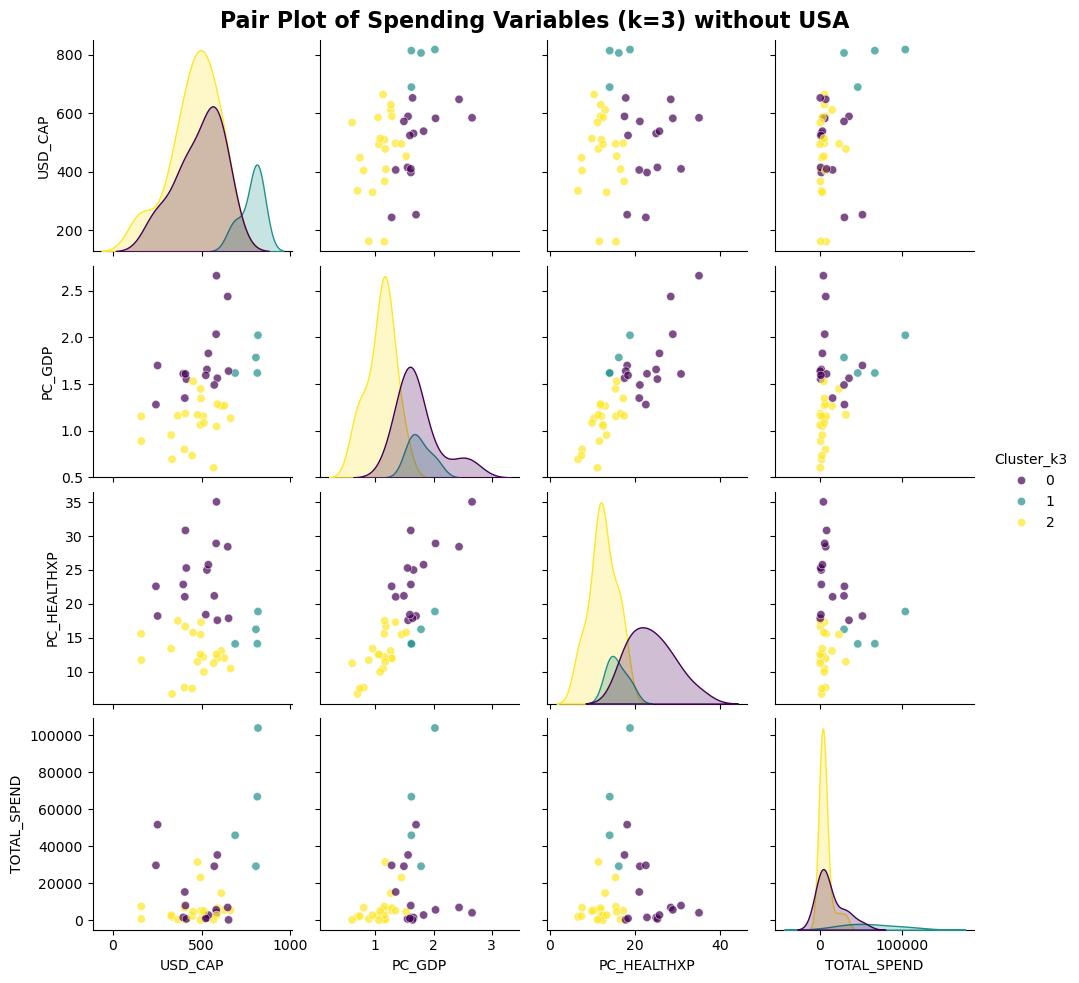

In [53]:
## USA EXCLUDED FOR THIS PAIR PLOT ANALYSIS - ALL 4 VARIABLES ARE USED FOR CLUSTERING ANALYSIS


import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_imputed is the imputed DataFrame from previous steps
# Filter the data for only the columns 'LOCATION', 'TIME', 'USD_CAP', 'PC_GDP', 'PC_HEALTHXP', 'TOTAL_SPEND'
df_cluster = df_imputed[['LOCATION', 'TIME', 'USD_CAP', 'PC_GDP', 'PC_HEALTHXP', 'TOTAL_SPEND']].dropna()

# Remove the USA from the LOCATION column (if requested)
df_cluster = df_cluster[df_cluster['LOCATION'] != 'USA']

# Filter data for the years 2011 to 2021 (including both)
df_cluster = df_cluster[df_cluster['TIME'].between(2011, 2021)]

# Group by country and calculate the average for the relevant columns over the years
df_cluster_avg = df_cluster.groupby('LOCATION')[['USD_CAP', 'PC_GDP', 'PC_HEALTHXP', 'TOTAL_SPEND']].mean().reset_index()

# Standardize the features (important for clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster_avg[['USD_CAP', 'PC_GDP', 'PC_HEALTHXP', 'TOTAL_SPEND']])

# Apply KMeans for k=3 to identify clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df_cluster_avg['Cluster_k3'] = kmeans_3.fit_predict(df_scaled)

# Create a pair plot with the spending variables, colored by the clusters
sns.pairplot(df_cluster_avg[['USD_CAP', 'PC_GDP', 'PC_HEALTHXP', 'TOTAL_SPEND', 'Cluster_k3']], 
             hue='Cluster_k3', palette='viridis', plot_kws={'alpha': 0.7})

# Bold the title
plt.suptitle('Pair Plot of Spending Variables (k=3) without USA', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the space to make room for the title

# List the countries in each cluster
print("\nCountries in each cluster (k=3):")
for cluster_num in range(3):
    countries_in_cluster = df_cluster_avg[df_cluster_avg['Cluster_k3'] == cluster_num]['LOCATION'].tolist()
    print(f"\nCluster {cluster_num}:")
    print(countries_in_cluster)

# Show the plot
plt.show()



Countries in each cluster (k=3):

Cluster 0:
['AUS', 'AUT', 'BEL', 'BRA', 'CHE', 'COL', 'CRI', 'CYP', 'CZE', 'DNK', 'ESP', 'EST', 'FIN', 'GBR', 'IRL', 'ISL', 'ISR', 'ITA', 'LUX', 'MEX', 'NLD', 'NOR', 'POL', 'PRT', 'SVN', 'SWE']

Cluster 1:
['CAN', 'DEU', 'FRA', 'JPN', 'USA']

Cluster 2:
['BGR', 'GRC', 'HRV', 'HUN', 'KOR', 'LTU', 'LVA', 'MLT', 'ROU', 'SVK']


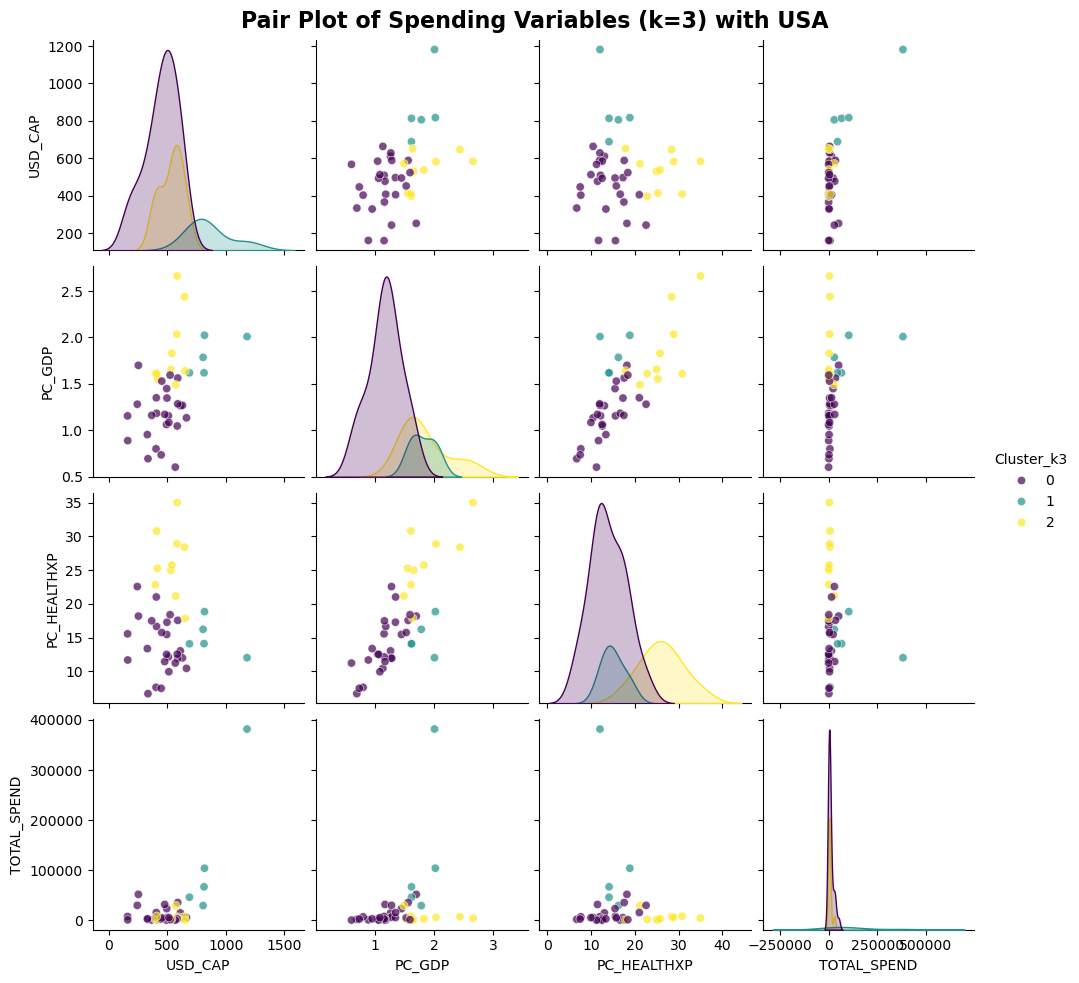

In [54]:
## USA INCLUDED FOR THIS PAIR PLOT ANALYSIS - ALL 4 VARIABLES ARE USED FOR CLUSTERING ANALYSIS


import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_imputed is the imputed DataFrame from previous steps
# Filter the data for only the columns 'LOCATION', 'TIME', 'USD_CAP', 'PC_GDP', 'PC_HEALTHXP', 'TOTAL_SPEND'
df_cluster = df_imputed[['LOCATION', 'TIME', 'USD_CAP', 'PC_GDP', 'PC_HEALTHXP', 'TOTAL_SPEND']].dropna()

# Filter data for the years 2011 to 2021 (including both)
df_cluster = df_cluster[df_cluster['TIME'].between(2011, 2021)]

# Group by country and calculate the average for the relevant columns over the years
df_cluster_avg = df_cluster.groupby('LOCATION')[['USD_CAP', 'PC_GDP', 'PC_HEALTHXP', 'TOTAL_SPEND']].mean().reset_index()

# Standardize the features (important for clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster_avg[['USD_CAP', 'PC_GDP', 'PC_HEALTHXP', 'TOTAL_SPEND']])

# Apply KMeans for k=3 to identify clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df_cluster_avg['Cluster_k3'] = kmeans_3.fit_predict(df_scaled)

# Create a pair plot with the spending variables, colored by the clusters
sns.pairplot(df_cluster_avg[['USD_CAP', 'PC_GDP', 'PC_HEALTHXP', 'TOTAL_SPEND', 'Cluster_k3']], 
             hue='Cluster_k3', palette='viridis', plot_kws={'alpha': 0.7})

# Bold the title
plt.suptitle('Pair Plot of Spending Variables (k=3) with USA', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the space to make room for the title

# List the countries in each cluster
print("\nCountries in each cluster (k=3):")
for cluster_num in range(3):
    countries_in_cluster = df_cluster_avg[df_cluster_avg['Cluster_k3'] == cluster_num]['LOCATION'].tolist()
    print(f"\nCluster {cluster_num}:")
    print(countries_in_cluster)

# Show the plot
plt.show()


TIME SERIES PLOTS

In [55]:
# Create a plot for USD_CAP over time by cluster
plt.figure(figsize=(12, 8))

# Loop through each cluster and plot USD_CAP over time
for cluster_num in range(3):
    # Filter data for the current cluster
    cluster_data = df_cluster[df_cluster['Cluster_k3'] == cluster_num]
    
    # Group by 'TIME' and calculate the mean USD_CAP for the cluster
    cluster_time_series = cluster_data.groupby('TIME')['USD_CAP'].mean()

    # Plot the time series with circle markers
    plt.plot(cluster_time_series.index, cluster_time_series.values, label=f'Cluster {cluster_num}', marker='o', markersize=8)

    # Annotate each point with the USD_CAP value
    for year, usd_cap in zip(cluster_time_series.index, cluster_time_series.values):
        plt.text(year, usd_cap, f'${usd_cap:,.2f}', fontsize=9, ha='right', va='bottom')

# Add labels and title (making title bold)
plt.title('USD_CAP Over Time by Cluster (2011-2021)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average USD_CAP', fontsize=14)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


KeyError: 'Cluster_k3'

<Figure size 1200x800 with 0 Axes>

EXCLUDE USA & RE-PLOT

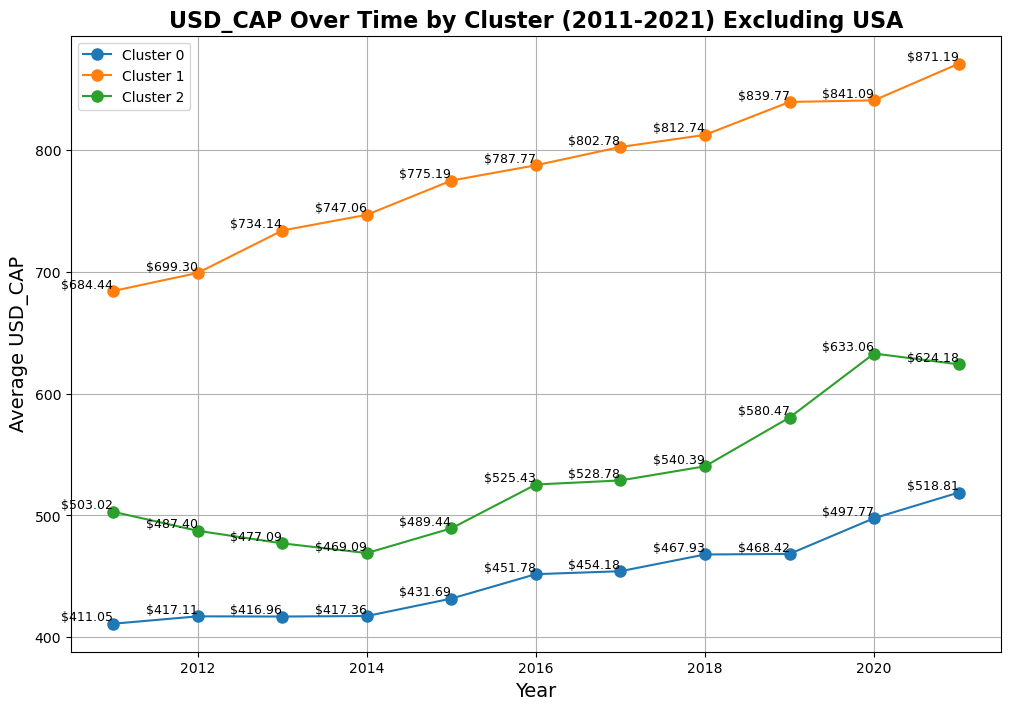

In [ ]:
# Create a plot for USD_CAP over time by cluster excluding USA
plt.figure(figsize=(12, 8))

# Loop through each cluster and plot USD_CAP over time
for cluster_num in range(3):
    # Filter data for the current cluster and exclude USA
    cluster_data = df_cluster[(df_cluster['Cluster_k3'] == cluster_num) & (df_cluster['LOCATION'] != 'USA')]
    
    # Group by 'TIME' and calculate the mean USD_CAP for the cluster
    cluster_time_series = cluster_data.groupby('TIME')['USD_CAP'].mean()

    # Plot the time series with circle markers
    plt.plot(cluster_time_series.index, cluster_time_series.values, label=f'Cluster {cluster_num}', marker='o', markersize=8)

    # Annotate each point with the USD_CAP value
    for year, usd_cap in zip(cluster_time_series.index, cluster_time_series.values):
        plt.text(year, usd_cap, f'${usd_cap:,.2f}', fontsize=9, ha='right', va='bottom')

# Add labels and title (making title bold)
plt.title('USD_CAP Over Time by Cluster (2011-2021) Excluding USA', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average USD_CAP', fontsize=14)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


ADD DOTTED LINE INDICATING MIN & MAX PER CAPITA SPENDING

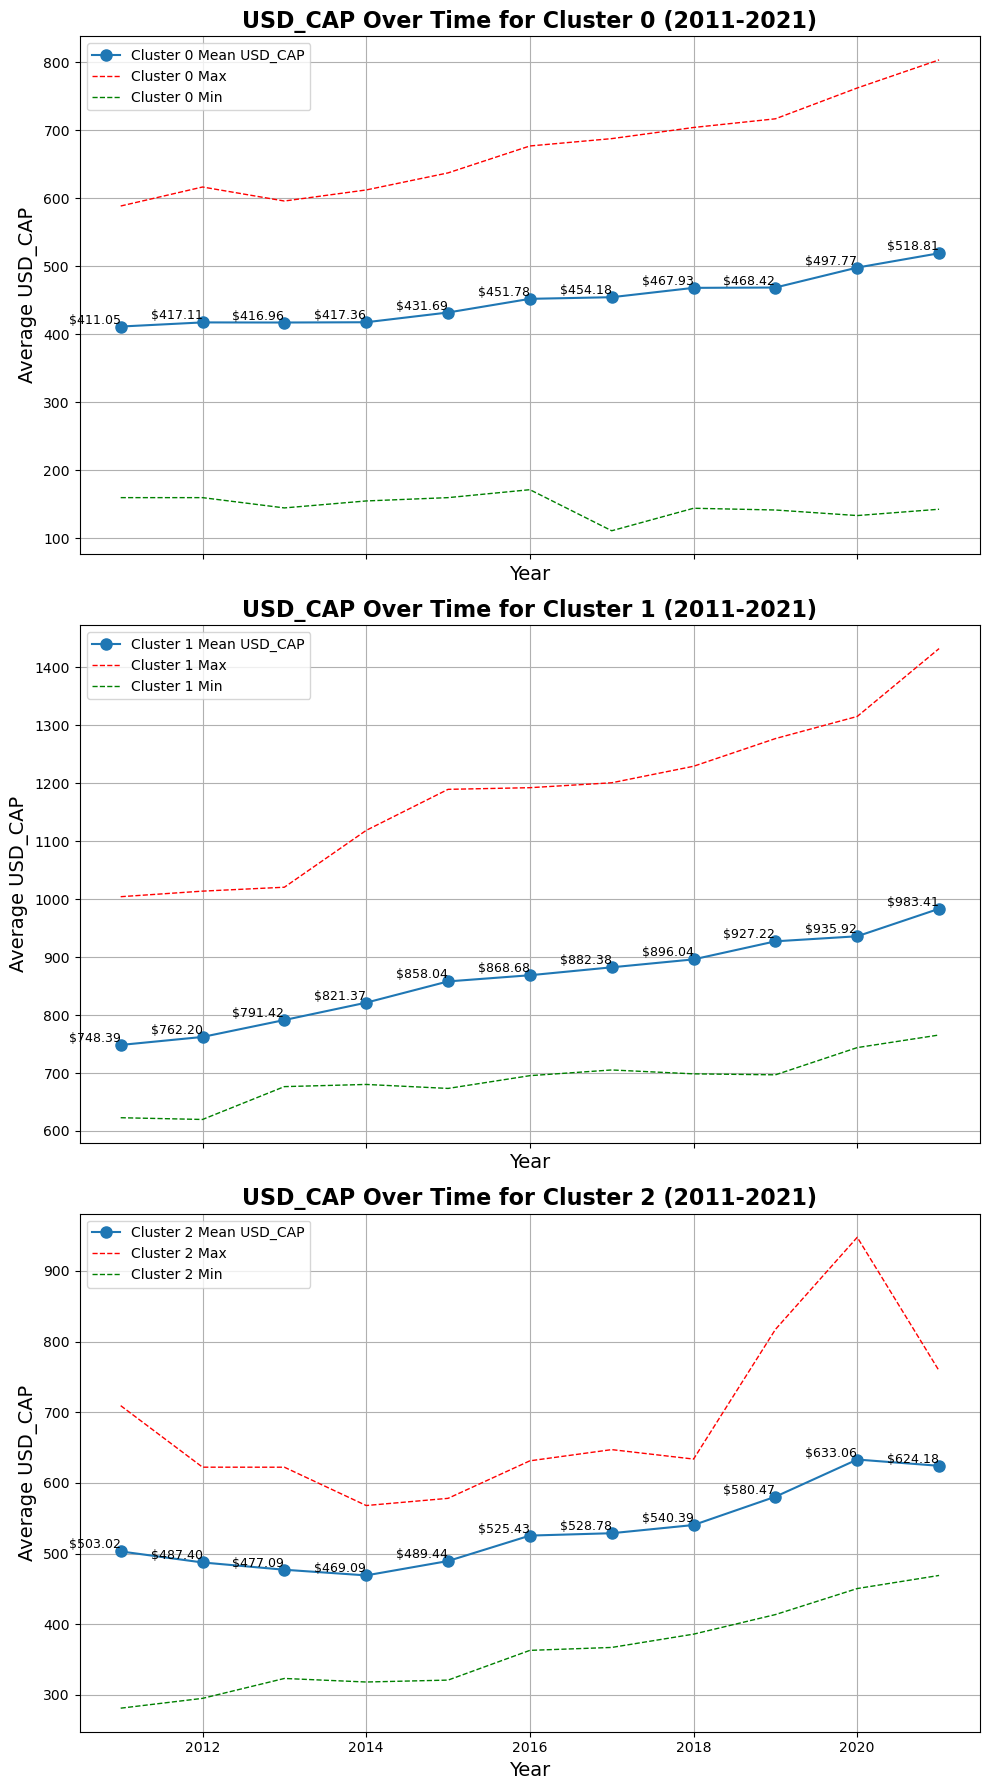

In [ ]:
# Create a figure with subplots for each cluster (one per graph)
fig, axes = plt.subplots(3, 1, figsize=(10, 18), sharex=True)

# Loop through each cluster to create a separate plot
for cluster_num in range(3):
    ax = axes[cluster_num]  # Select the subplot for the current cluster

    # Filter data for the current cluster
    cluster_data = df_cluster[df_cluster['Cluster_k3'] == cluster_num]
    
    # Group by 'TIME' and calculate the mean USD_CAP for the cluster
    cluster_time_series = cluster_data.groupby('TIME')['USD_CAP'].mean()

    # Plot the time series with circle markers for each cluster
    ax.plot(cluster_time_series.index, cluster_time_series.values, marker='o', markersize=8, label=f'Cluster {cluster_num} Mean USD_CAP')

    # Annotate each point with the USD_CAP value
    for year, usd_cap in zip(cluster_time_series.index, cluster_time_series.values):
        ax.text(year, usd_cap, f'${usd_cap:,.2f}', fontsize=9, ha='right', va='bottom')

    # Calculate the max and min USD_CAP for each year
    cluster_max = cluster_data.groupby('TIME')['USD_CAP'].max()
    cluster_min = cluster_data.groupby('TIME')['USD_CAP'].min()

    # Add dotted lines for the max and min values
    ax.plot(cluster_max.index, cluster_max.values, 'r--', label=f'Cluster {cluster_num} Max', linewidth=1)
    ax.plot(cluster_min.index, cluster_min.values, 'g--', label=f'Cluster {cluster_num} Min', linewidth=1)

    # Set the title and labels for the current cluster's plot
    ax.set_title(f'USD_CAP Over Time for Cluster {cluster_num} (2011-2021)', fontsize=16, fontweight='bold')
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Average USD_CAP', fontsize=14)
    ax.grid(True)
    ax.legend()

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


PREDICT FUTURE SPEND USING ARIMA

float64


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/s

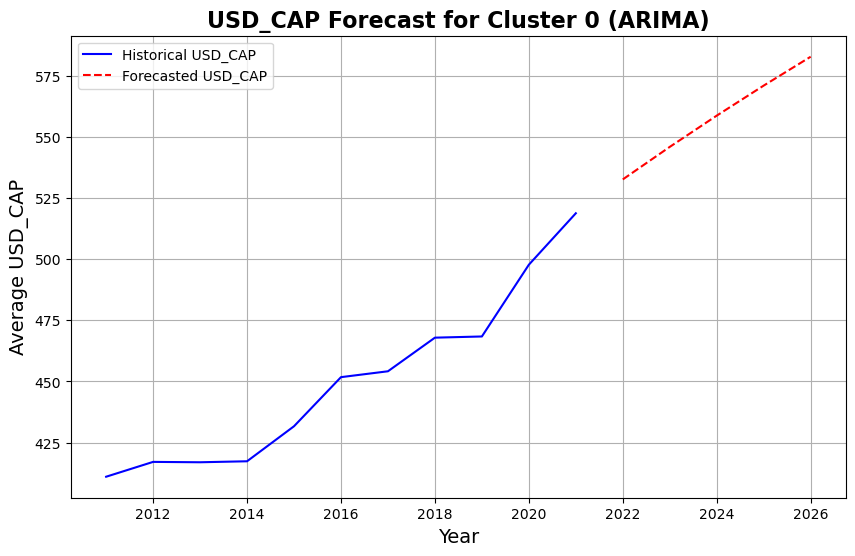

Forecasted USD_CAP for Cluster 0: {2022: 532.6605166234725, 2023: 545.9669997983975, 2024: 558.7538189807785, 2025: 571.0412688391314, 2026: 582.848851465276}


In [ ]:
# Ensure 'USD_CAP' is numeric and handle any errors in conversion
df_cluster['USD_CAP'] = pd.to_numeric(df_cluster['USD_CAP'], errors='coerce')

# Drop any rows where 'USD_CAP' is NaN
df_cluster = df_cluster.dropna(subset=['USD_CAP'])

# Filter the data for one cluster (for example, Cluster 0)
cluster_num = 0
cluster_data = df_cluster[df_cluster['Cluster_k3'] == cluster_num]
cluster_time_series = cluster_data.groupby('TIME')['USD_CAP'].mean()

# Check the data type of the time series
print(cluster_time_series.dtypes)

# Fit ARIMA model (example with p=1, d=1, q=1)
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(cluster_time_series, order=(1, 1, 1))  # ARIMA(p, d, q)
model_fit = model.fit()

# Forecast future values (e.g., next 5 years, 2022 to 2026)
forecast_years = 5
forecast = model_fit.forecast(steps=forecast_years)

# Plot the forecast along with the historical data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cluster_time_series.index, cluster_time_series.values, label='Historical USD_CAP', color='blue')
plt.plot(np.arange(cluster_time_series.index[-1] + 1, cluster_time_series.index[-1] + forecast_years + 1), forecast, label='Forecasted USD_CAP', color='red', linestyle='--')
plt.title(f'USD_CAP Forecast for Cluster {cluster_num} (ARIMA)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average USD_CAP', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Print the forecasted values
forecast_years_list = list(range(cluster_time_series.index[-1] + 1, cluster_time_series.index[-1] + forecast_years + 1))
forecast_dict = dict(zip(forecast_years_list, forecast))
print(f"Forecasted USD_CAP for Cluster {cluster_num}:", forecast_dict)


float64


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/base/

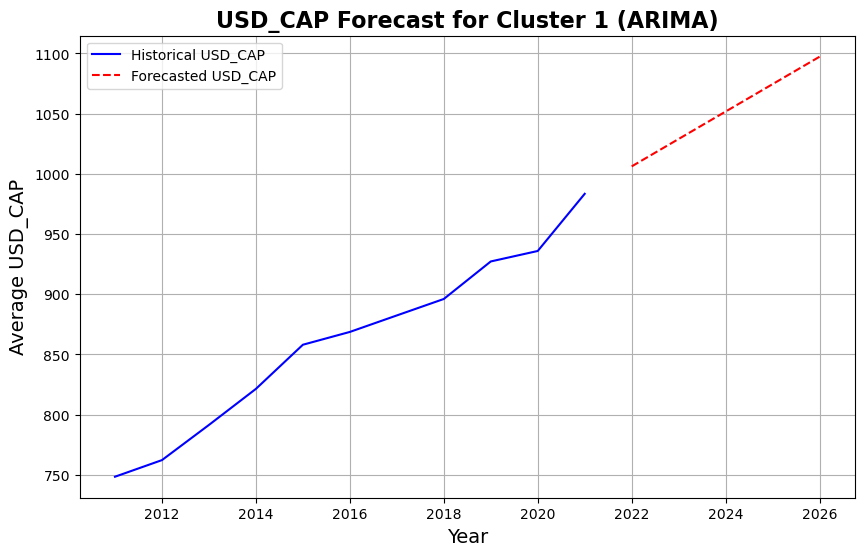

Forecasted USD_CAP for Cluster 1: {2022: 1006.1890899637808, 2023: 1028.9658301930153, 2024: 1051.7425206878122, 2025: 1074.5191614482799, 2026: 1097.295752474527}


In [ ]:
# Ensure 'USD_CAP' is numeric and handle any errors in conversion
df_cluster['USD_CAP'] = pd.to_numeric(df_cluster['USD_CAP'], errors='coerce')

# Drop any rows where 'USD_CAP' is NaN
df_cluster = df_cluster.dropna(subset=['USD_CAP'])

# Filter the data for Cluster 1
cluster_num = 1
cluster_data = df_cluster[df_cluster['Cluster_k3'] == cluster_num]
cluster_time_series = cluster_data.groupby('TIME')['USD_CAP'].mean()

# Check the data type of the time series (optional but recommended)
print(cluster_time_series.dtypes)

# Fit ARIMA model (example with p=1, d=1, q=1)
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(cluster_time_series, order=(1, 1, 1))  # ARIMA(p, d, q)
model_fit = model.fit()

# Forecast future values (e.g., next 5 years, 2022 to 2026)
forecast_years = 5
forecast = model_fit.forecast(steps=forecast_years)

# Plot the forecast along with the historical data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cluster_time_series.index, cluster_time_series.values, label='Historical USD_CAP', color='blue')
plt.plot(np.arange(cluster_time_series.index[-1] + 1, cluster_time_series.index[-1] + forecast_years + 1), forecast, label='Forecasted USD_CAP', color='red', linestyle='--')
plt.title(f'USD_CAP Forecast for Cluster {cluster_num} (ARIMA)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average USD_CAP', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Print the forecasted values
forecast_years_list = list(range(cluster_time_series.index[-1] + 1, cluster_time_series.index[-1] + forecast_years + 1))
forecast_dict = dict(zip(forecast_years_list, forecast))
print(f"Forecasted USD_CAP for Cluster {cluster_num}:", forecast_dict)


float64


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/s

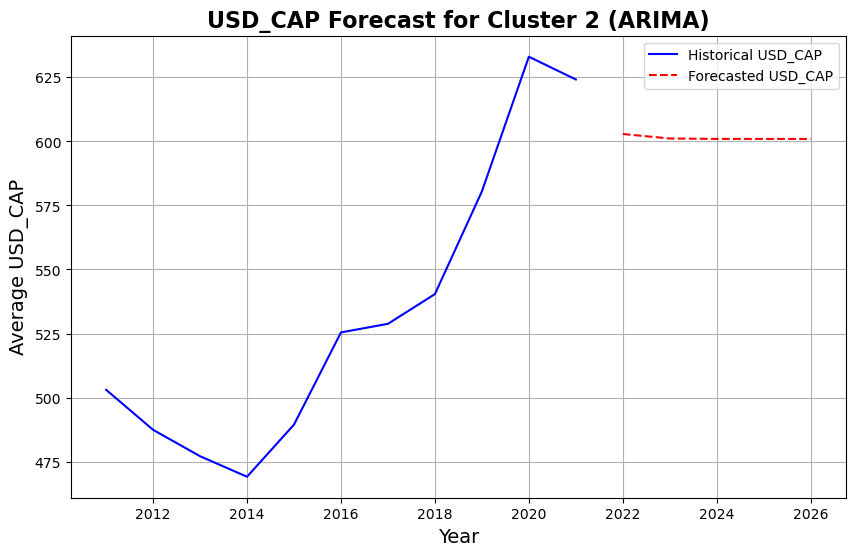

Forecasted USD_CAP for Cluster 2: {2022: 602.8968181850272, 2023: 601.1321543154442, 2024: 600.9858514794838, 2025: 600.9737219628212, 2026: 600.9727163420243}


In [ ]:
# Ensure 'USD_CAP' is numeric and handle any errors in conversion
df_cluster['USD_CAP'] = pd.to_numeric(df_cluster['USD_CAP'], errors='coerce')

# Drop any rows where 'USD_CAP' is NaN
df_cluster = df_cluster.dropna(subset=['USD_CAP'])

# Filter the data for Cluster 2
cluster_num = 2
cluster_data = df_cluster[df_cluster['Cluster_k3'] == cluster_num]
cluster_time_series = cluster_data.groupby('TIME')['USD_CAP'].mean()

# Check the data type of the time series (optional but recommended)
print(cluster_time_series.dtypes)

# Fit ARIMA model (example with p=1, d=1, q=1)
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(cluster_time_series, order=(1, 1, 1))  # ARIMA(p, d, q)
model_fit = model.fit()

# Forecast future values (e.g., next 5 years, 2022 to 2026)
forecast_years = 5
forecast = model_fit.forecast(steps=forecast_years)

# Plot the forecast along with the historical data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cluster_time_series.index, cluster_time_series.values, label='Historical USD_CAP', color='blue')
plt.plot(np.arange(cluster_time_series.index[-1] + 1, cluster_time_series.index[-1] + forecast_years + 1), forecast, label='Forecasted USD_CAP', color='red', linestyle='--')
plt.title(f'USD_CAP Forecast for Cluster {cluster_num} (ARIMA)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average USD_CAP', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Print the forecasted values
forecast_years_list = list(range(cluster_time_series.index[-1] + 1, cluster_time_series.index[-1] + forecast_years + 1))
forecast_dict = dict(zip(forecast_years_list, forecast))
print(f"Forecasted USD_CAP for Cluster {cluster_num}:", forecast_dict)


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/base/

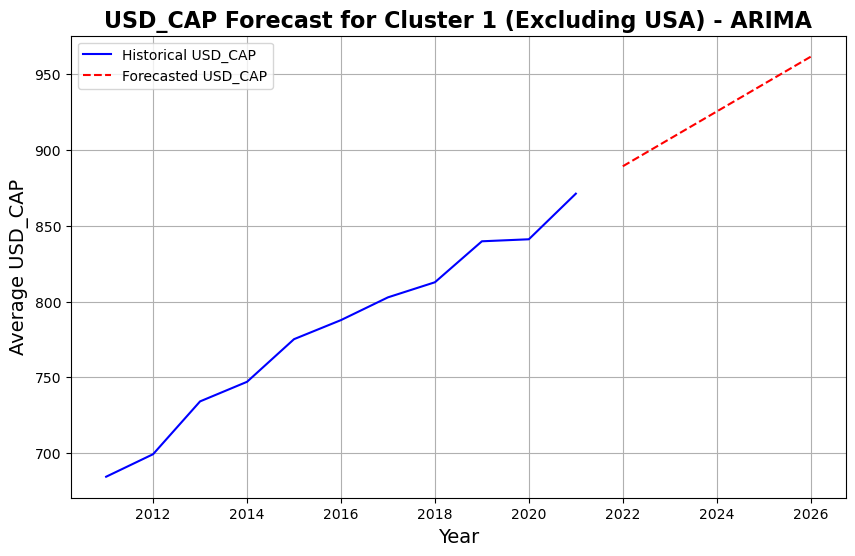

Forecasted USD_CAP for Cluster 1 (Excluding USA): {2022: 889.2581320398926, 2023: 907.3280685577852, 2024: 925.3979345539527, 2025: 943.4677300286705, 2026: 961.5374549822138}


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ensure 'USD_CAP' is numeric and handle any errors in conversion
df_cluster['USD_CAP'] = pd.to_numeric(df_cluster['USD_CAP'], errors='coerce')

# Drop any rows where 'USD_CAP' is NaN
df_cluster = df_cluster.dropna(subset=['USD_CAP'])

# Remove USA from the dataset
df_cluster_no_usa = df_cluster[df_cluster['LOCATION'] != 'USA']

# ARIMA forecasting for Cluster 1, excluding USA
# Filter data for Cluster 1, excluding USA
cluster_data = df_cluster_no_usa[df_cluster_no_usa['Cluster_k3'] == 1]

# Group by 'TIME' and calculate the mean USD_CAP for the cluster
cluster_time_series = cluster_data.groupby('TIME')['USD_CAP'].mean()

# Fit ARIMA model (example with p=1, d=1, q=1)
model = ARIMA(cluster_time_series, order=(1, 1, 1))  # ARIMA(p, d, q)
model_fit = model.fit()

# Forecast future values (e.g., next 5 years, 2022 to 2026)
forecast_years = 5
forecast = model_fit.forecast(steps=forecast_years)

# Plot the forecast along with the historical data
plt.figure(figsize=(10, 6))
plt.plot(cluster_time_series.index, cluster_time_series.values, label='Historical USD_CAP', color='blue')
plt.plot(np.arange(cluster_time_series.index[-1] + 1, cluster_time_series.index[-1] + forecast_years + 1), forecast, label='Forecasted USD_CAP', color='red', linestyle='--')

# Title only for Cluster 1 (excluding USA)
plt.title('USD_CAP Forecast for Cluster 1 (Excluding USA) - ARIMA', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average USD_CAP', fontsize=14)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the forecasted values for Cluster 1 (Excluding USA)
forecast_years_list = list(range(cluster_time_series.index[-1] + 1, cluster_time_series.index[-1] + forecast_years + 1))
forecast_dict = dict(zip(forecast_years_list, forecast))
print(f"Forecasted USD_CAP for Cluster 1 (Excluding USA):", forecast_dict)


To combine the three clusters' forecasts in a single plot while maintaining proper proportions, we can use a subplots grid to display each cluster's historical data and forecast together. Here's how we can approach this:

We'll create a 3-row subplot where each row corresponds to one cluster's data.
Each subplot will show both the historical and forecasted data.
We will ensure the plots are scaled and labeled appropriately.

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/s

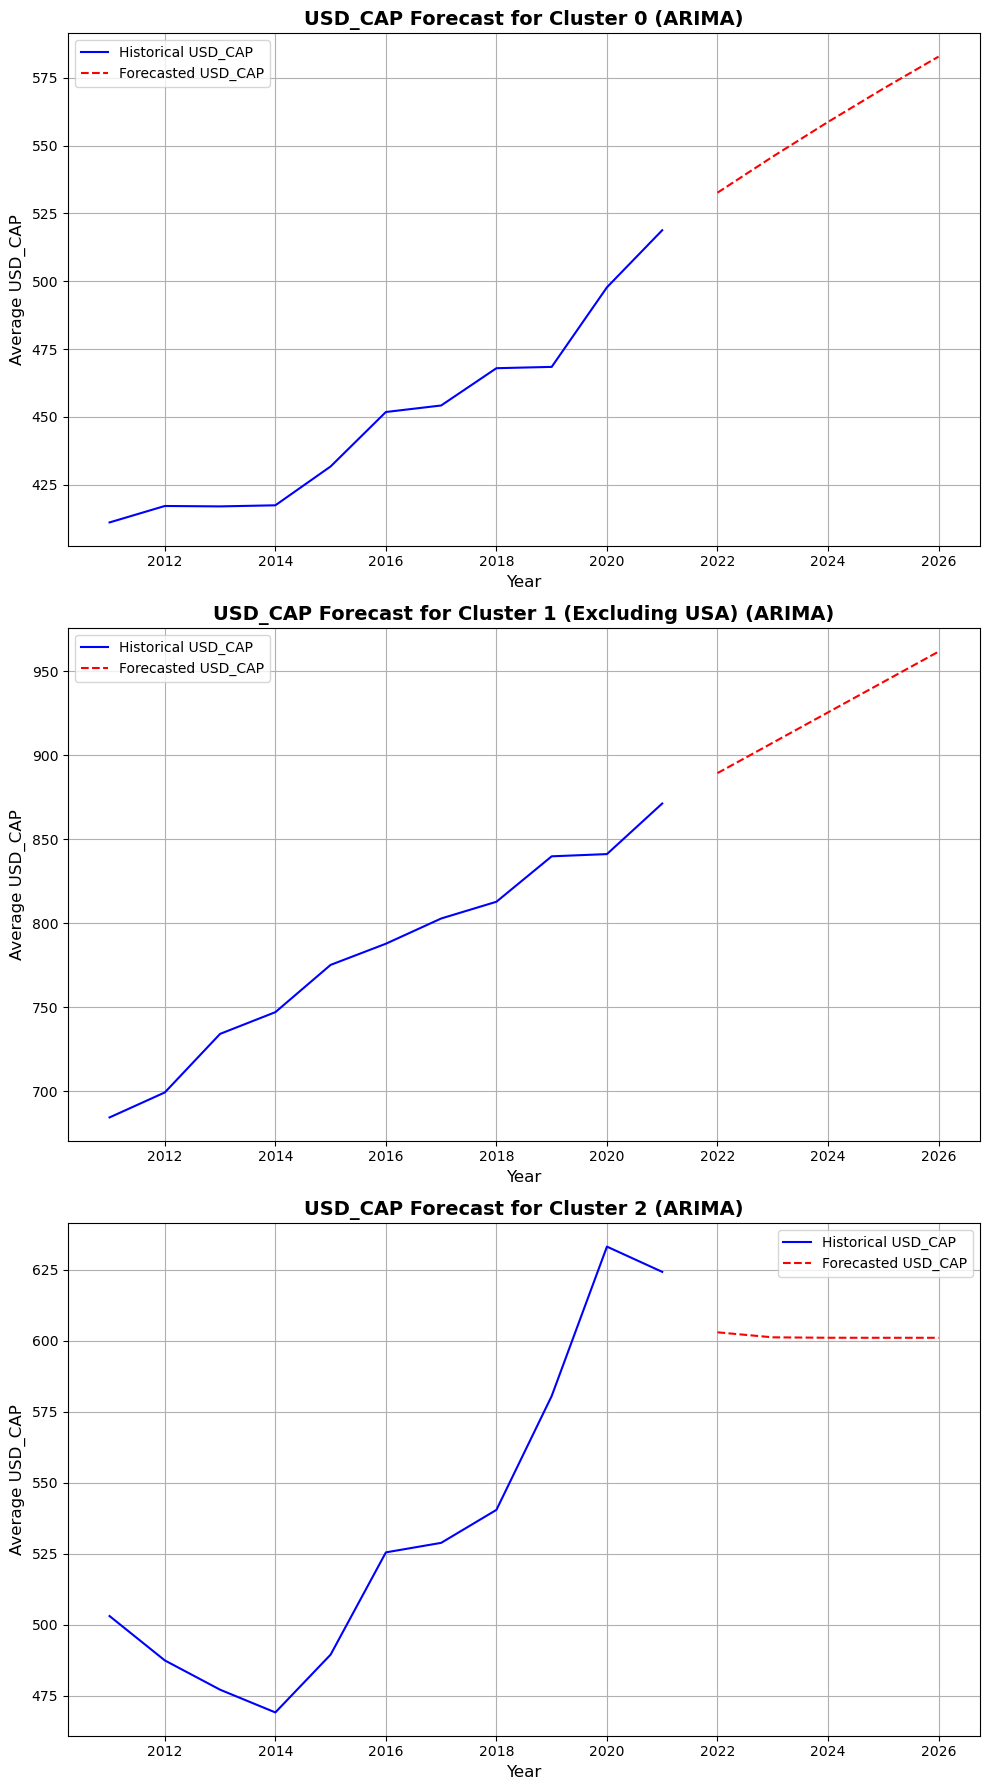

Forecasted USD_CAP for Cluster 0: {2022: 532.6605166234725, 2023: 545.9669997983975, 2024: 558.7538189807785, 2025: 571.0412688391314, 2026: 582.848851465276}
Forecasted USD_CAP for Cluster 1: {2022: 889.2581320398926, 2023: 907.3280685577852, 2024: 925.3979345539527, 2025: 943.4677300286705, 2026: 961.5374549822138}
Forecasted USD_CAP for Cluster 2: {2022: 602.8968181850272, 2023: 601.1321543154442, 2024: 600.9858514794838, 2025: 600.9737219628212, 2026: 600.9727163420243}


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/statsmodels/tsa/s

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ensure 'USD_CAP' is numeric and handle any errors in conversion
df_cluster['USD_CAP'] = pd.to_numeric(df_cluster['USD_CAP'], errors='coerce')

# Drop any rows where 'USD_CAP' is NaN
df_cluster = df_cluster.dropna(subset=['USD_CAP'])

# Set the number of clusters and forecast period
clusters = [0, 1, 2]
forecast_years = 5
fig, axes = plt.subplots(len(clusters), 1, figsize=(10, 18))  # Create a 3-row subplot

# Loop through each cluster and plot the data
for i, cluster_num in enumerate(clusters):
    if cluster_num == 1:
        # For Cluster 1, exclude USA
        cluster_data = df_cluster[df_cluster['Cluster_k3'] == cluster_num]
        cluster_data = cluster_data[cluster_data['LOCATION'] != 'USA']
        title = f'USD_CAP Forecast for Cluster {cluster_num} (Excluding USA) (ARIMA)'
    else:
        # For other clusters (0 and 2), no exclusion needed
        cluster_data = df_cluster[df_cluster['Cluster_k3'] == cluster_num]
        title = f'USD_CAP Forecast for Cluster {cluster_num} (ARIMA)'

    # Group by 'TIME' and calculate the mean USD_CAP for the cluster
    cluster_time_series = cluster_data.groupby('TIME')['USD_CAP'].mean()

    # Fit ARIMA model (example with p=1, d=1, q=1)
    model = ARIMA(cluster_time_series, order=(1, 1, 1))  # ARIMA(p, d, q)
    model_fit = model.fit()

    # Forecast future values
    forecast = model_fit.forecast(steps=forecast_years)

    # Plot the historical data and forecast for the current cluster
    axes[i].plot(cluster_time_series.index, cluster_time_series.values, label='Historical USD_CAP', color='blue')
    axes[i].plot(np.arange(cluster_time_series.index[-1] + 1, cluster_time_series.index[-1] + forecast_years + 1), forecast, label='Forecasted USD_CAP', color='red', linestyle='--')
    
    # Title and labels
    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Year', fontsize=12)
    axes[i].set_ylabel('Average USD_CAP', fontsize=12)
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Print the forecasted values for each cluster
for cluster_num in clusters:
    if cluster_num == 1:
        # For Cluster 1, exclude USA
        cluster_data = df_cluster[df_cluster['Cluster_k3'] == cluster_num]
        cluster_data = cluster_data[cluster_data['LOCATION'] != 'USA']
    else:
        # For other clusters (0 and 2), no exclusion needed
        cluster_data = df_cluster[df_cluster['Cluster_k3'] == cluster_num]
    
    # Group by 'TIME' and calculate the mean USD_CAP for the cluster
    cluster_time_series = cluster_data.groupby('TIME')['USD_CAP'].mean()
    
    # Fit ARIMA model for forecasting
    model = ARIMA(cluster_time_series, order=(1, 1, 1))
    model_fit = model.fit()
    
    forecast = model_fit.forecast(steps=forecast_years)
    forecast_years_list = list(range(cluster_time_series.index[-1] + 1, cluster_time_series.index[-1] + forecast_years + 1))
    forecast_dict = dict(zip(forecast_years_list, forecast))
    print(f"Forecasted USD_CAP for Cluster {cluster_num}:", forecast_dict)


TIME SERIES PLOT ON TOAL_SPEND

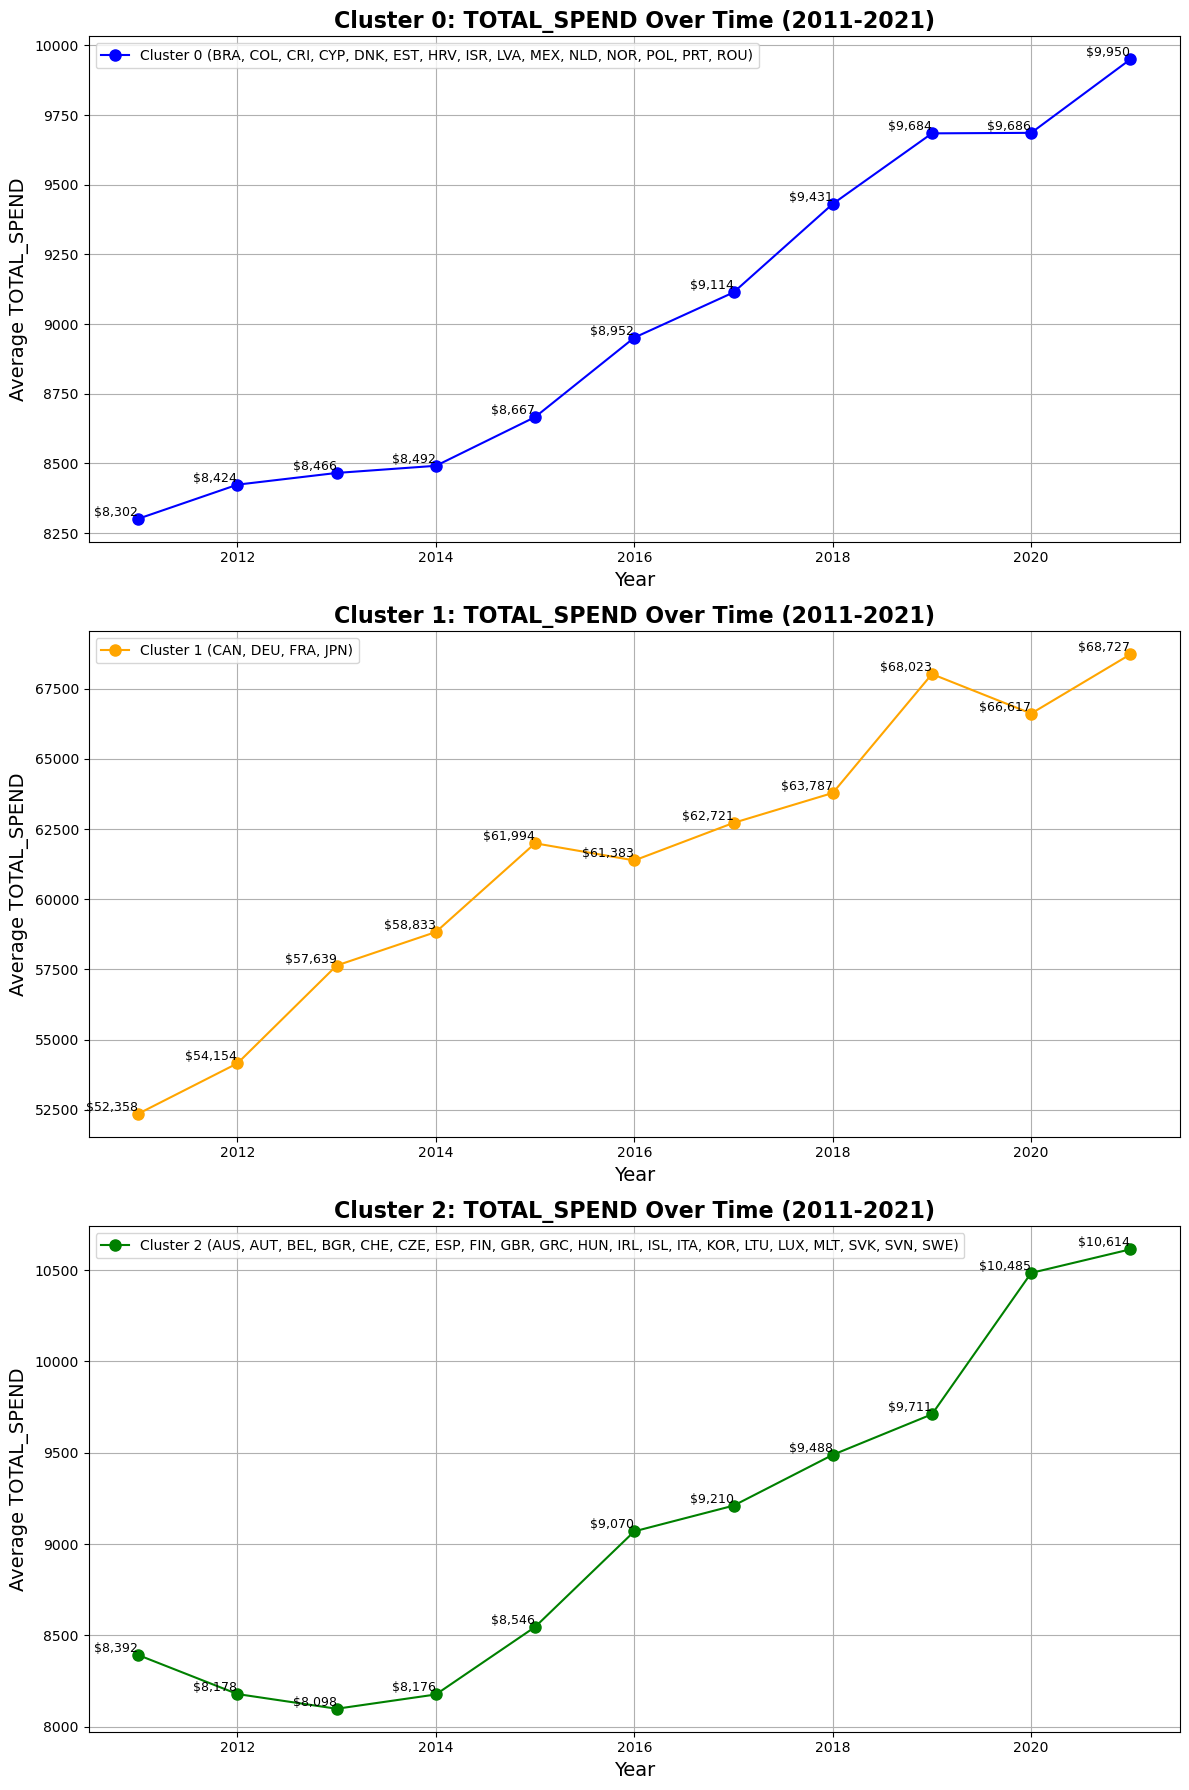

In [76]:
import matplotlib.pyplot as plt

# List of countries in each cluster
cluster_0_countries = ['BRA', 'COL', 'CRI', 'CYP', 'DNK', 'EST', 'HRV', 'ISR', 'LVA', 'MEX', 'NLD', 'NOR', 'POL', 'PRT', 'ROU']
cluster_1_countries = ['CAN', 'DEU', 'FRA', 'JPN']
cluster_2_countries = ['AUS', 'AUT', 'BEL', 'BGR', 'CHE', 'CZE', 'ESP', 'FIN', 'GBR', 'GRC', 'HUN', 'IRL', 'ISL', 'ITA', 'KOR', 'LTU', 'LUX', 'MLT', 'SVK', 'SVN', 'SWE']

# Function to plot TOTAL_SPEND for a given cluster
def plot_cluster_total_spend(df, cluster_countries, cluster_label, color, ax):
    # Filter data for the selected cluster countries
    df_cluster = df[df['LOCATION'].isin(cluster_countries)]
    
    # Group by year and calculate the mean TOTAL_SPEND for the cluster countries
    cluster_time_series = df_cluster.groupby('TIME')['TOTAL_SPEND'].mean()

    # Plot the time series for the cluster
    ax.plot(cluster_time_series.index, cluster_time_series.values, label=f'Cluster {cluster_label} ({", ".join(cluster_countries)})', marker='o', markersize=8, color=color)

    # Annotate each point with the TOTAL_SPEND value (without decimals)
    for year, total_spend in zip(cluster_time_series.index, cluster_time_series.values):
        ax.text(year, total_spend, f'${total_spend:,.0f}', fontsize=9, ha='right', va='bottom')

# Create a figure with 3 subplots: one for each cluster
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot for Cluster 0 (Blue)
plot_cluster_total_spend(df_imputed, cluster_0_countries, 0, 'blue', axes[0])
axes[0].set_title('Cluster 0: TOTAL_SPEND Over Time (2011-2021)', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Average TOTAL_SPEND', fontsize=14)
axes[0].grid(True)
axes[0].legend(loc='upper left', fontsize=10)

# Plot for Cluster 1 (Orange)
plot_cluster_total_spend(df_imputed, cluster_1_countries, 1, 'orange', axes[1])
axes[1].set_title('Cluster 1: TOTAL_SPEND Over Time (2011-2021)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Average TOTAL_SPEND', fontsize=14)
axes[1].grid(True)
axes[1].legend(loc='upper left', fontsize=10)

# Plot for Cluster 2 (Green)
plot_cluster_total_spend(df_imputed, cluster_2_countries, 2, 'green', axes[2])
axes[2].set_title('Cluster 2: TOTAL_SPEND Over Time (2011-2021)', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Year', fontsize=14)
axes[2].set_ylabel('Average TOTAL_SPEND', fontsize=14)
axes[2].grid(True)
axes[2].legend(loc='upper left', fontsize=10)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()
